## Invistico Airlines : Detailed Scenario based Analysis
    This Analysis is done based on 42 scenarios to check what are those services which need to be improved. The company is providing services to its customers, and the company want to improve its provided services for more benefits. Three main conclusions are drawn here:
    
    1. Services require improvement for those customers who are either dissatisfied or disloyal or both:
         Departure/Arrival time convenient
         Online boarding
         Seat comfort
         Inflight wifi service
         Checkin service
         
    2. Services require improvement for Loyal and Satisfied Customers:
         On-board service
         Ease of Online booking
         Seat comfort
         Food and drink
         Cleanliness
         Leg room service
         
    3. All group of customers including children and teenagers, need a good seat comfort, that is very important.     

### Importing Libraries...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Loading Data...

In [2]:
data = pd.read_csv("/kaggle/input/invistico-airline/Invistico_Airline.csv")
data.head()

satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   
2               0  ...               2                       2   
3               0  ...               3                       1   
4               0  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 23 columns]

### Checking null data

In [3]:
nulldata = data.isnull().sum()
nulldata[nulldata>0]

Arrival Delay in Minutes    393
dtype: int64

In [4]:
data.shape

(129880, 23)

#### As null data are very less as compared to the shape of data, so dropping null data

In [5]:
data = data.dropna()
data.shape

(129487, 23)

In [6]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  object 
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Seat comfort                       129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Food and drink                     129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Inflight wifi service              1294

### Separating numerical and categorical columns

In [8]:
num_data = []
for col in data.columns:
    if (data[col].dtype != 'object'):
        num_data.append(col)

len(num_data)        

18

In [9]:
cat_data = list(set(list(data.columns)) - set(num_data))
cat_data

['Gender', 'Customer Type', 'Type of Travel', 'satisfaction', 'Class']

In [10]:
data.describe()

Age  Flight Distance   Seat comfort  \
count  129487.000000    129487.000000  129487.000000   
mean       39.428761      1981.008974       2.838586   
std        15.117597      1026.884131       1.392873   
min         7.000000        50.000000       0.000000   
25%        27.000000      1359.000000       2.000000   
50%        40.000000      1924.000000       3.000000   
75%        51.000000      2543.000000       4.000000   
max        85.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                      129487.000000   129487.000000  129487.000000   
mean                            2.990277        2.852024       2.990377   
std                             1.527183        1.443587       1.305917   
min                             0.000000        0.000000       0.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000        3.000000       3.000000   
75%                             4.000000        4.000000       4.000000   
max                             5.000000        5.000000       5.000000   

       Inflight wifi service  Inflight entertainment  Online support  \
count          129487.000000           129487.000000   129487.000000   
mean                3.249160                3.383745        3.519967   
std                 1.318765                1.345959        1.306326   
min                 0.000000                0.000000        0.000000   
25%                 2.000000                2.000000        3.000000   
50%                 3.000000                4.000000        4.000000   
75%                 4.000000                4.000000        5.000000   
max                 5.000000                5.000000        5.000000   

       Ease of Online booking  On-board service  Leg room service  \
count           129487.000000     129487.000000     129487.000000   
mean                 3.472171          3.465143          3.486118   
std                  1.305573          1.270755          1.292079   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          3.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  5.000000          4.000000          5.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service    Cleanliness  Online boarding  \
count     129487.000000    129487.000000  129487.000000    129487.000000   
mean           3.695460         3.340729       3.705886         3.352545   
std            1.156487         1.260561       1.151683         1.298624   
min            1.000000         0.000000       0.000000         0.000000   
25%            3.000000         3.000000       3.000000         2.000000   
50%            4.000000         3.000000       4.000000         4.000000   
75%            5.000000         4.000000       5.000000         4.000000   
max            5.000000         5.000000       5.000000         5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               129487.000000             129487.000000  
mean                    14.643385                 15.091129  
std                     37.932867                 38.465650  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

### Checking counts of each classes in categorical data

In [11]:
for i in cat_data:
    print(f'Classes in {i} :\n{data[i].value_counts()}\n')

Classes in Gender :
Female    65703
Male      63784
Name: Gender, dtype: int64

Classes in Customer Type :
Loyal Customer       105773
disloyal Customer     23714
Name: Customer Type, dtype: int64

Classes in Type of Travel :
Business travel    89445
Personal Travel    40042
Name: Type of Travel, dtype: int64

Classes in satisfaction :
satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

Classes in Class :
Business    61990
Eco         58117
Eco Plus     9380
Name: Class, dtype: int64



### Visualizing the count of each classes in categorical data

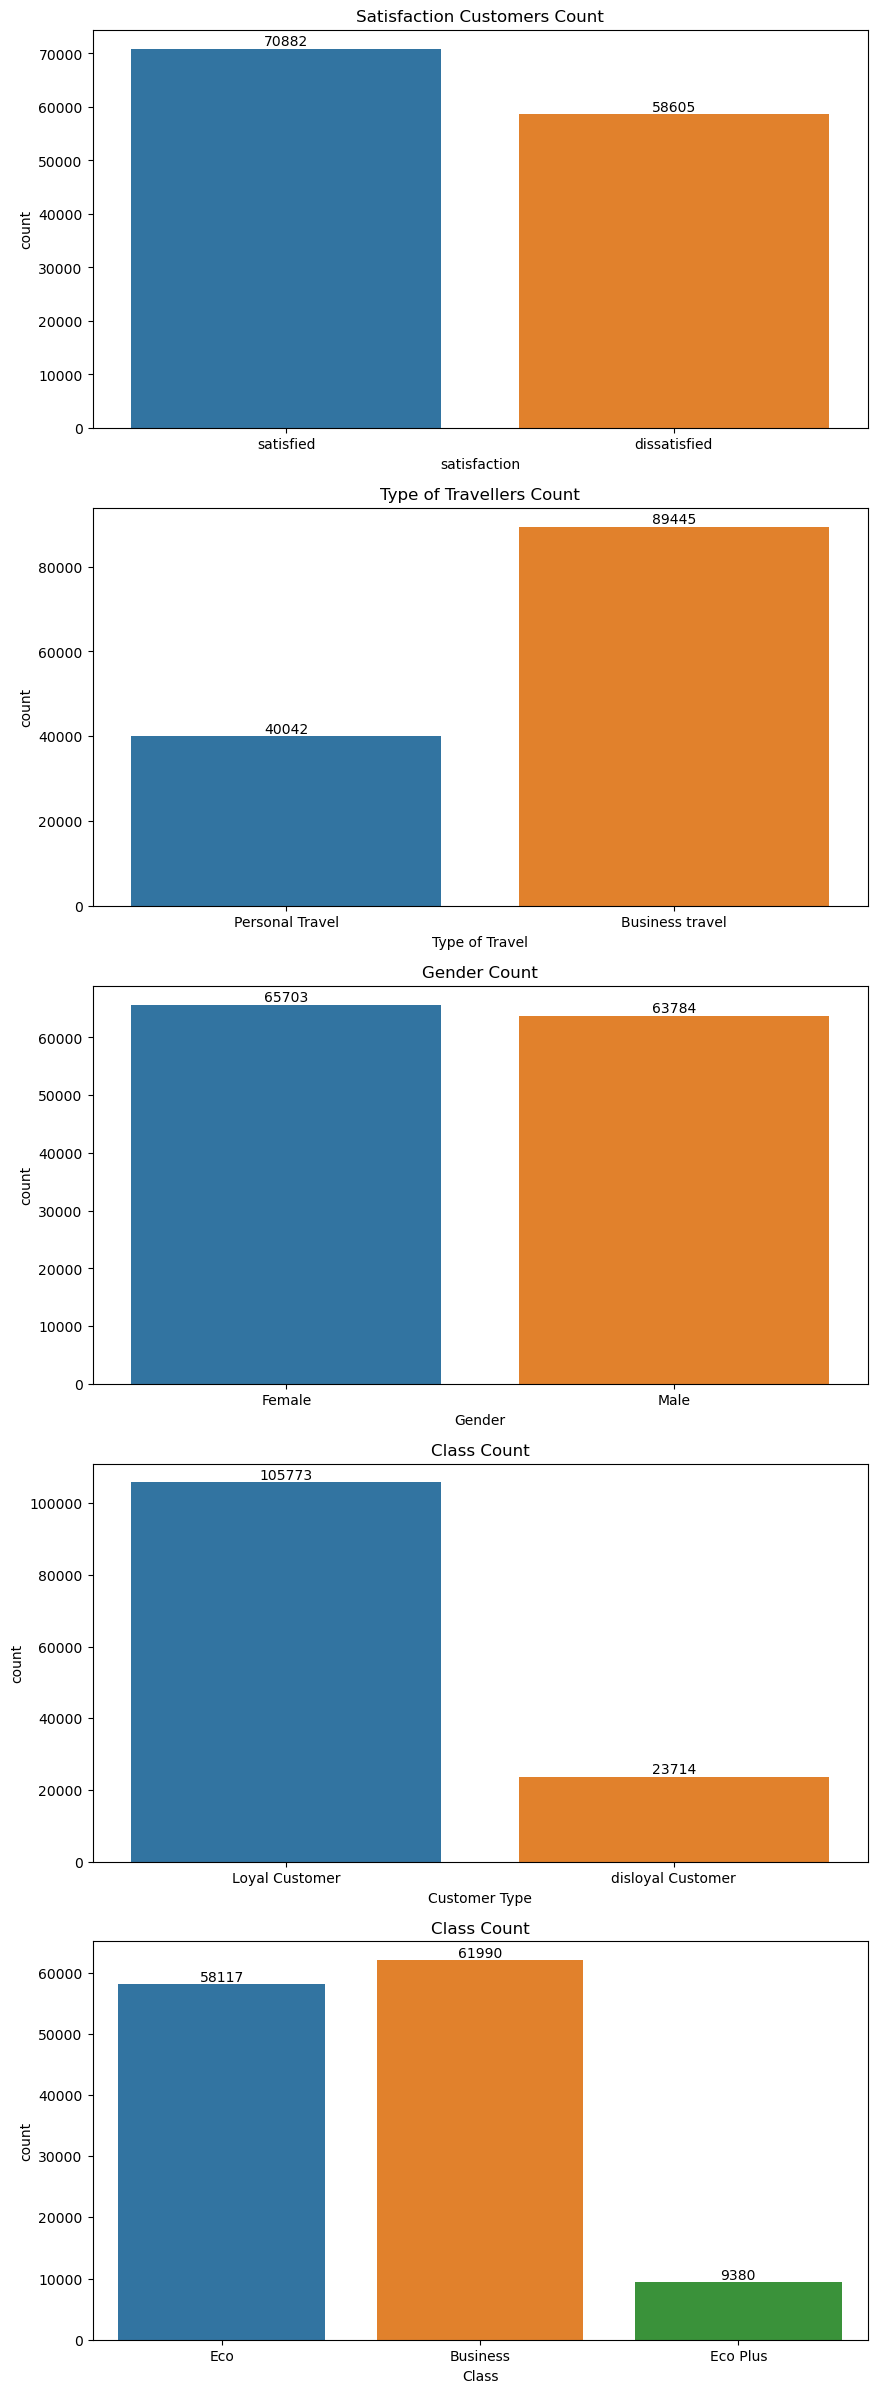

In [12]:
plt.subplots(5,1,figsize = (10,30))
plt.subplot(5,1,1)
ax1 = sns.countplot(data,x = 'satisfaction')
plt.title("Satisfaction Customers Count")
ax1.bar_label(ax1.containers[0])
plt.subplot(5,1,2)
ax2 = sns.countplot(data,x = 'Type of Travel')
plt.title("Type of Travellers Count")
ax2.bar_label(ax2.containers[0])
plt.subplot(5,1,3)
ax3 = sns.countplot(data,x = 'Gender')
plt.title("Gender Count")
ax3.bar_label(ax3.containers[0])
plt.subplot(5,1,4)
ax4 = sns.countplot(data,x = 'Customer Type')
plt.title("Customer type Count")
ax4.bar_label(ax4.containers[0])
plt.title("Class Count")
plt.subplot(5,1,5)
ax5 = sns.countplot(data,x = 'Class')
ax5.bar_label(ax5.containers[0])
plt.title("Class Count")
plt.show()


### Visualizing outliers

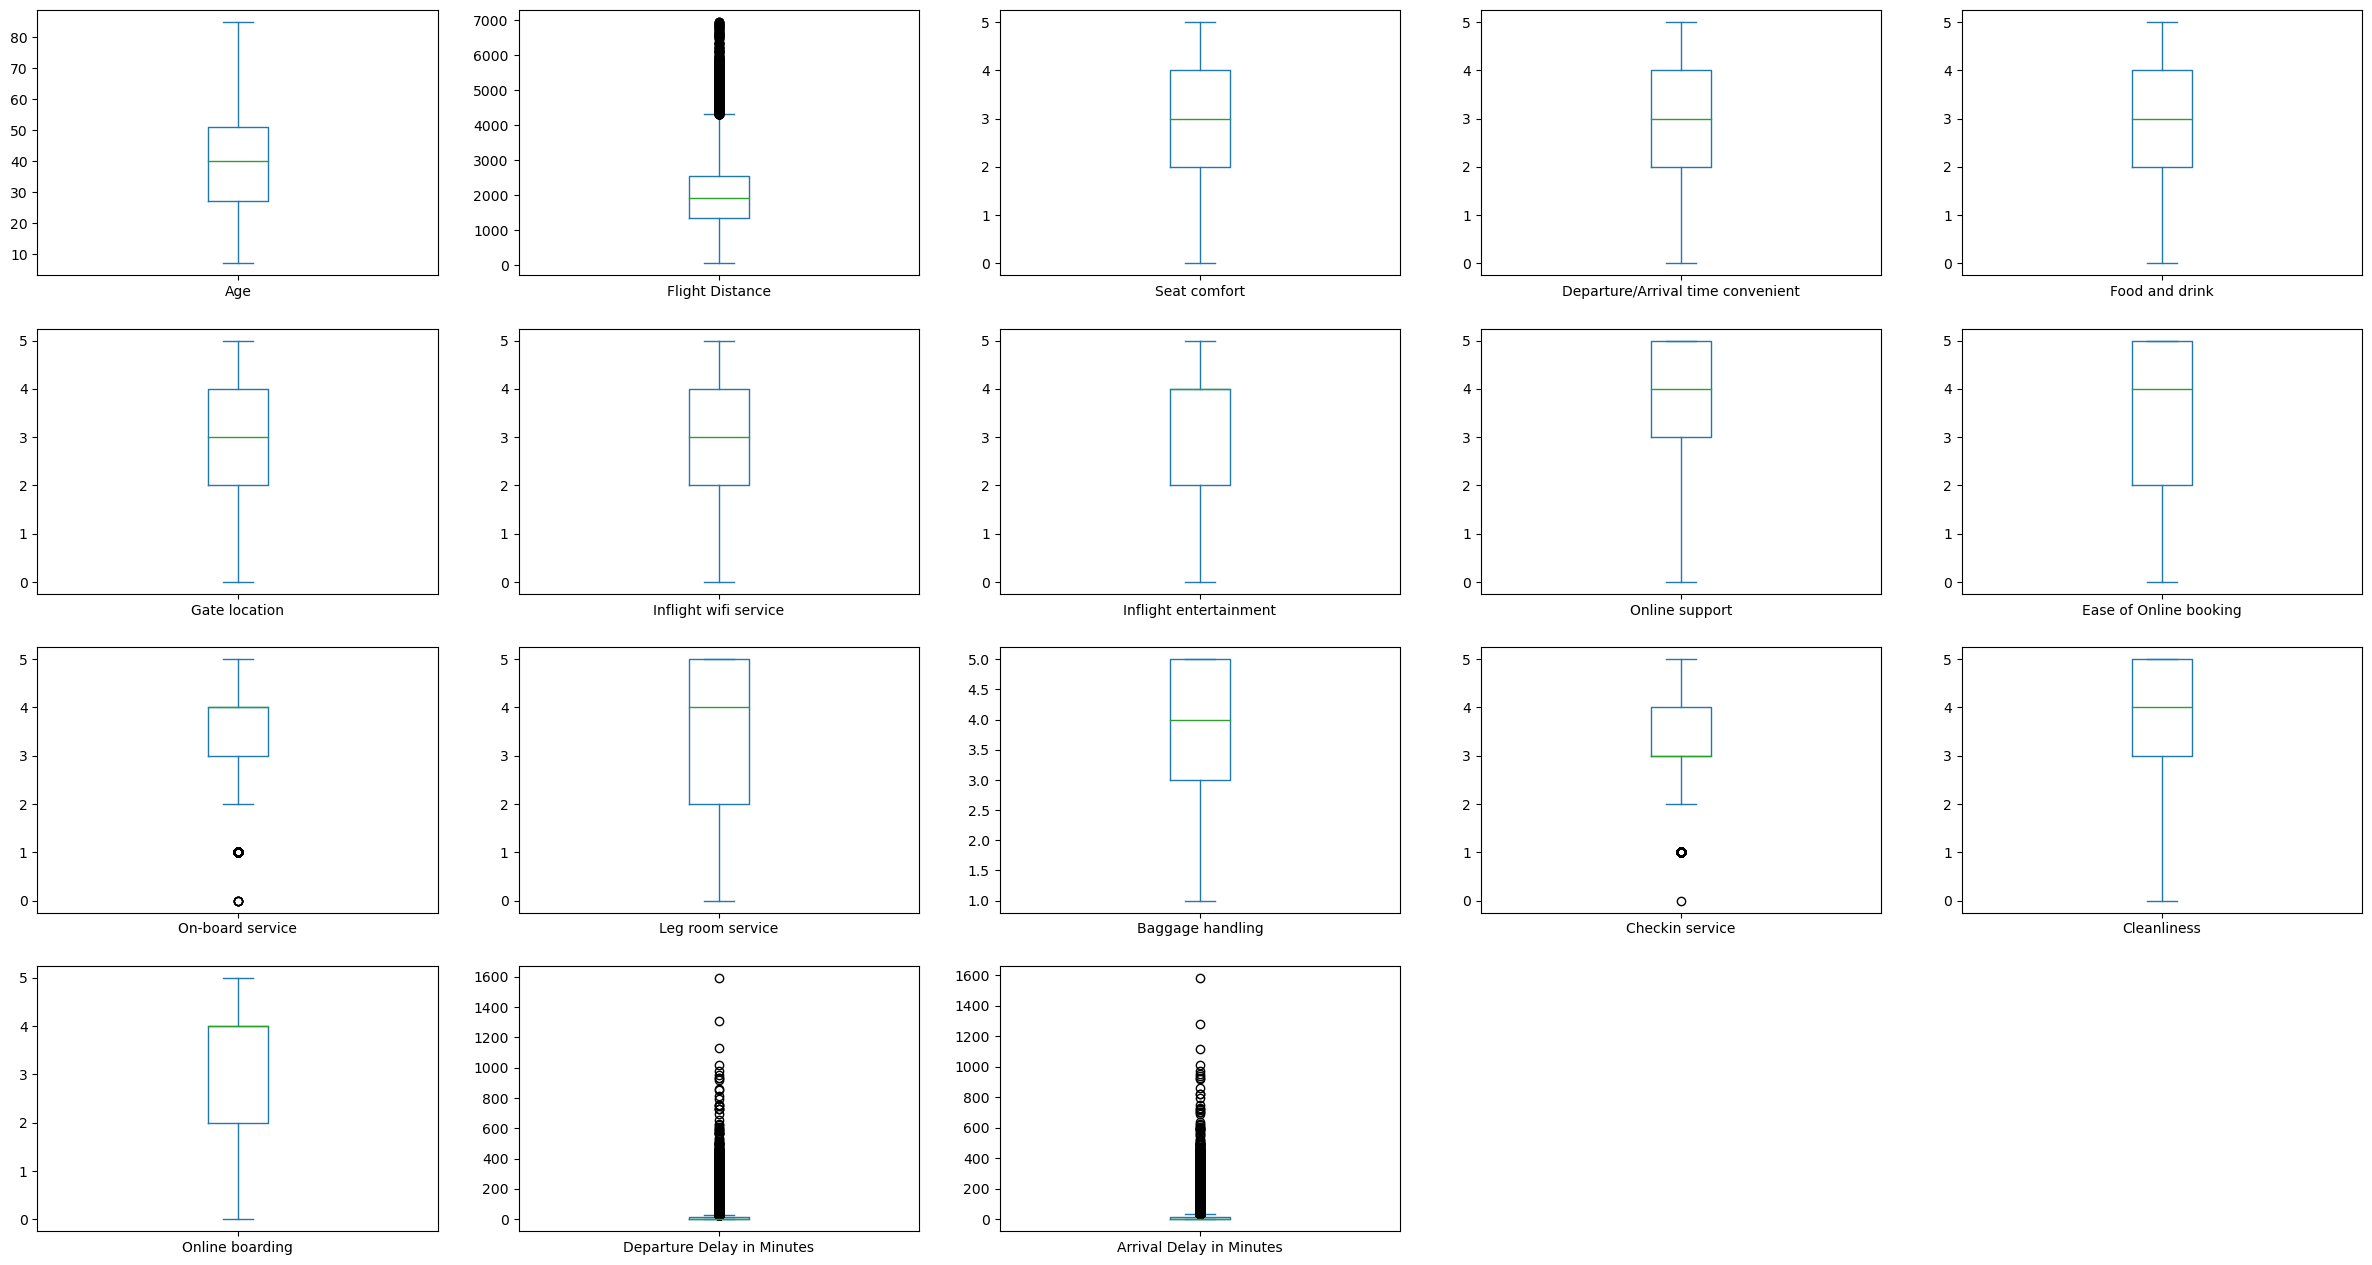

In [13]:
data[num_data].plot(kind = 'box',subplots = True,layout = (5,5),figsize = (30,20))
plt.show()

#### We will not remove outliers because we have to analyse this dataset

### Separating those numerical data which seems like categorical

In [14]:
cat_num_data = list(set(num_data)-set(['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']))
cat_num_data

['Ease of Online booking',
 'Departure/Arrival time convenient',
 'Inflight wifi service',
 'On-board service',
 'Seat comfort',
 'Inflight entertainment',
 'Gate location',
 'Leg room service',
 'Cleanliness',
 'Food and drink',
 'Baggage handling',
 'Checkin service',
 'Online support',
 'Online boarding']

### Checking the unique values of cat_num_data

In [15]:
for i in cat_num_data:
    print(f"Number of unique values in {i}: {data[i].nunique()}")
    print(f"Unique Values : {data[i].unique()}\n")

Number of unique values in Ease of Online booking: 6
Unique Values : [3 2 1 5 4 0]

Number of unique values in Departure/Arrival time convenient: 6
Unique Values : [0 1 2 3 4 5]

Number of unique values in Inflight wifi service: 6
Unique Values : [2 0 3 4 5 1]

Number of unique values in On-board service: 6
Unique Values : [3 4 1 2 5 0]

Number of unique values in Seat comfort: 6
Unique Values : [0 1 4 5 2 3]

Number of unique values in Inflight entertainment: 6
Unique Values : [4 2 0 3 5 1]

Number of unique values in Gate location: 6
Unique Values : [2 3 4 1 5 0]

Number of unique values in Leg room service: 6
Unique Values : [0 4 3 2 5 1]

Number of unique values in Cleanliness: 6
Unique Values : [3 4 1 2 5 0]

Number of unique values in Food and drink: 6
Unique Values : [0 1 2 3 4 5]

Number of unique values in Baggage handling: 5
Unique Values : [3 4 1 2 5]

Number of unique values in Checkin service: 6
Unique Values : [5 2 4 3 1 0]

Number of unique values in Online support: 6
Un

#### From the unique values, it seems like that they are some kind of rating given to each services. It means that the cat_num_data that we separated are services provided to customers

### Again separating proper numerical data

In [16]:
num_data = list(set(num_data)-set(cat_num_data))
num_data

['Departure Delay in Minutes',
 'Flight Distance',
 'Arrival Delay in Minutes',
 'Age']

#### We can make some age groups which will help us in analysing this dataset easily. So, making new age groups from age data.

In [17]:
data['Age']=data['Age'].replace((np.arange(7,13)),'Children')
data['Age']=data['Age'].replace((np.arange(13,21)),'Teenager')
data['Age']=data['Age'].replace((np.arange(20,51)),'Adult')
data['Age']=data['Age'].replace((np.arange(50,91)),'Senior Citizen')

In [18]:
data = data.rename(columns = {'Age':'Age Group'})
data.head(2)

satisfaction  Gender   Customer Type       Age Group   Type of Travel  \
0    satisfied  Female  Loyal Customer  Senior Citizen  Personal Travel   
1    satisfied    Male  Loyal Customer           Adult  Personal Travel   

      Class  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0       Eco              265             0                                  0   
1  Business             2464             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3   
1               0  ...               2                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  

[2 rows x 23 columns]

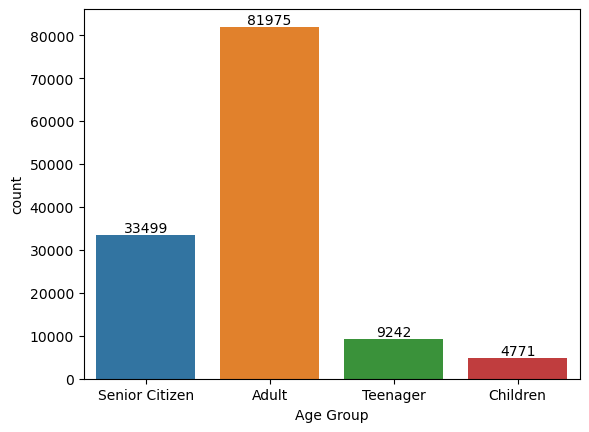

In [19]:
ax = sns.countplot(data,x = 'Age Group')
ax.bar_label(ax.containers[0])
plt.show()

#### We can see that number of adult customers are highest.

In [20]:
cat_data

['Gender', 'Customer Type', 'Type of Travel', 'satisfaction', 'Class']

#### Gender classification in each age group

In [21]:
v0 = data.groupby(['Age Group','Gender'])['Gender'].count()
v0

Age Group       Gender
Adult           Female    41738
                Male      40237
Children        Female     2403
                Male       2368
Senior Citizen  Female    16834
                Male      16665
Teenager        Female     4728
                Male       4514
Name: Gender, dtype: int64

#### Visualizing the distribution of Gender over different age group for flight

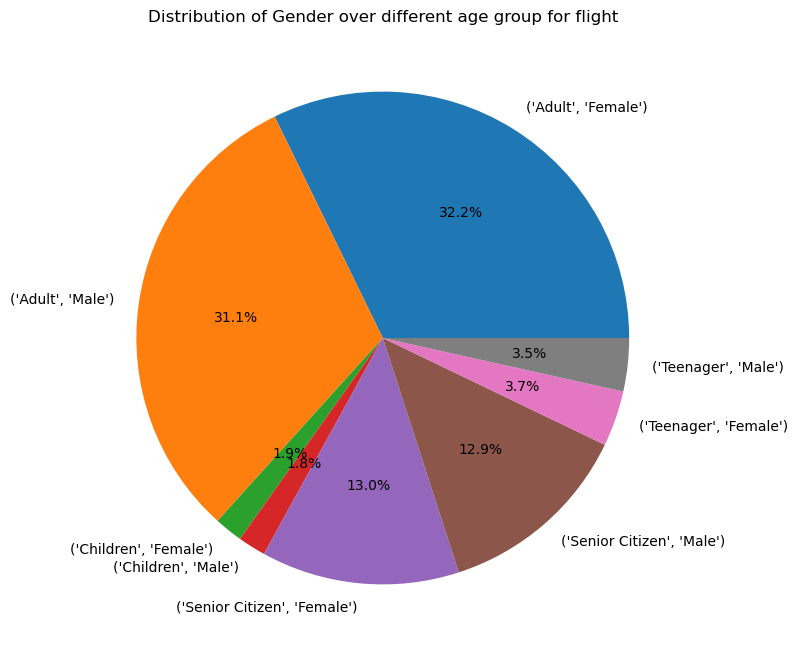

In [22]:
plt.subplots(figsize = (15,8))
plt.pie(x=v0.values,labels=v0.index,autopct='%1.1f%%')
plt.title("Distribution of Gender over different age group for flight")
plt.show()

##### Major customers are adult female

#### Customer type classification over age group

In [23]:
v1 = data.groupby(['Age Group','Customer Type'])['Customer Type'].count()
v1

Age Group       Customer Type    
Adult           Loyal Customer       62467
                disloyal Customer    19508
Children        Loyal Customer        4229
                disloyal Customer      542
Senior Citizen  Loyal Customer       32266
                disloyal Customer     1233
Teenager        Loyal Customer        6811
                disloyal Customer     2431
Name: Customer Type, dtype: int64

#### Visualizing the distribution of customer type over different age group for flight

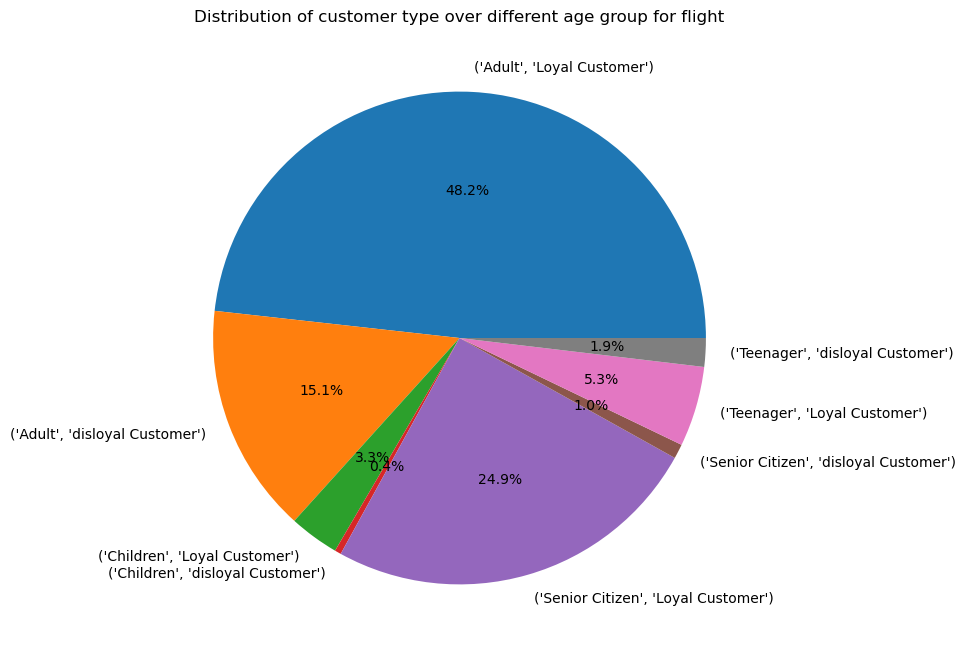

In [24]:
plt.subplots(figsize = (15,8))
plt.pie(x=v1.values,labels=v1.index,autopct='%1.1f%%')
plt.title("Distribution of customer type over different age group for flight")
plt.show()

#### Major loyal customers are adult. From the distribution, we can see that very less senior citizen customers are disloyal.

#### Class categorization over age group

In [25]:
v2 = data.groupby(['Age Group','Class'])['Class'].count()
v2

Age Group       Class   
Adult           Business    42856
                Eco         33631
                Eco Plus     5488
Children        Business      660
                Eco          3568
                Eco Plus      543
Senior Citizen  Business    16522
                Eco         14471
                Eco Plus     2506
Teenager        Business     1952
                Eco          6447
                Eco Plus      843
Name: Class, dtype: int64

#### Visualizing the distribution of class over different age group for flight

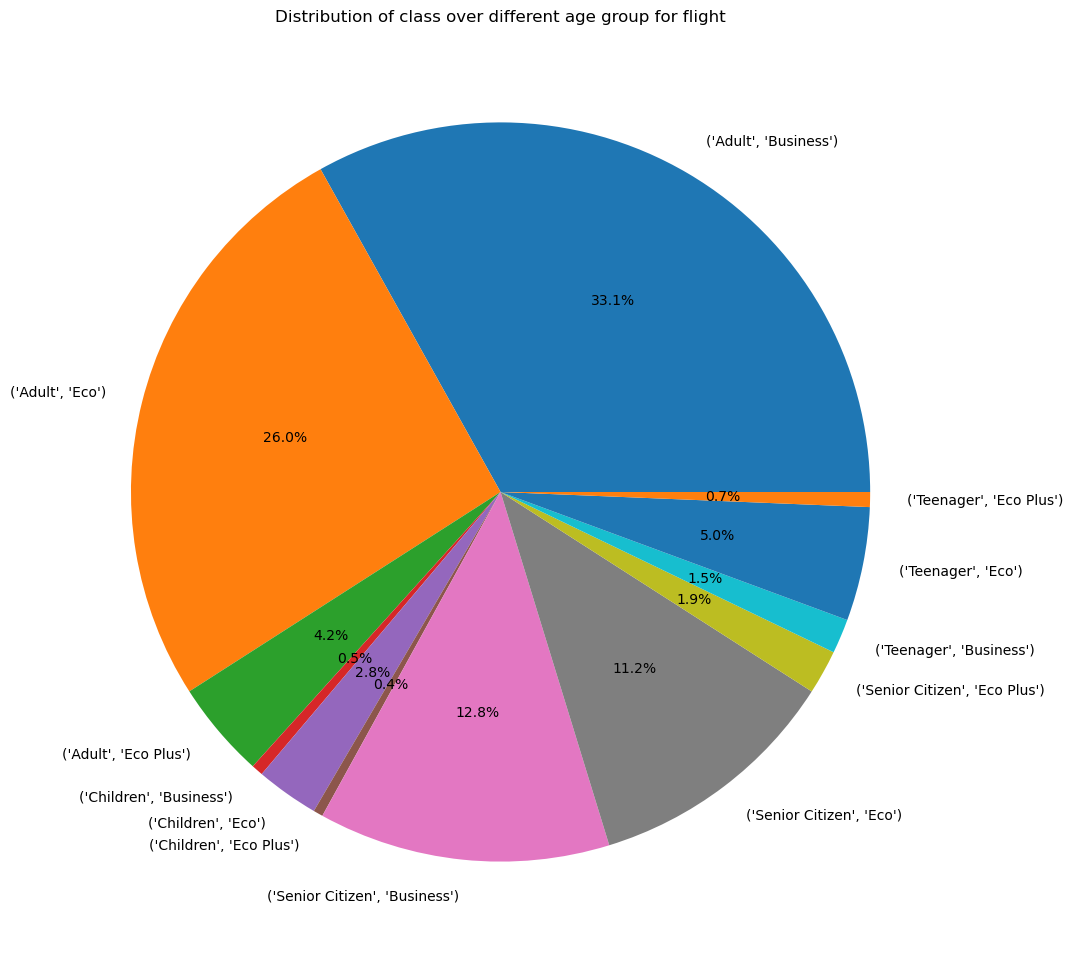

In [26]:
plt.subplots(figsize = (15,12))
plt.pie(x=v2.values,labels=v2.index,autopct='%1.1f%%')
plt.title("Distribution of class over different age group for flight")
plt.show()

##### Majority of the teenagers and children mostly travel in eco class, while majority of the adults and senior citizens travel in business and eco class

#### Classification of type of travel in age group

In [27]:
v3 = data.groupby(['Age Group','Type of Travel'])['Type of Travel'].count()
v3

Age Group       Type of Travel 
Adult           Business travel    63256
                Personal Travel    18719
Children        Business travel     1039
                Personal Travel     3732
Senior Citizen  Business travel    21042
                Personal Travel    12457
Teenager        Business travel     4108
                Personal Travel     5134
Name: Type of Travel, dtype: int64

#### Visualizing the distribution of types of travel over different age group for flight

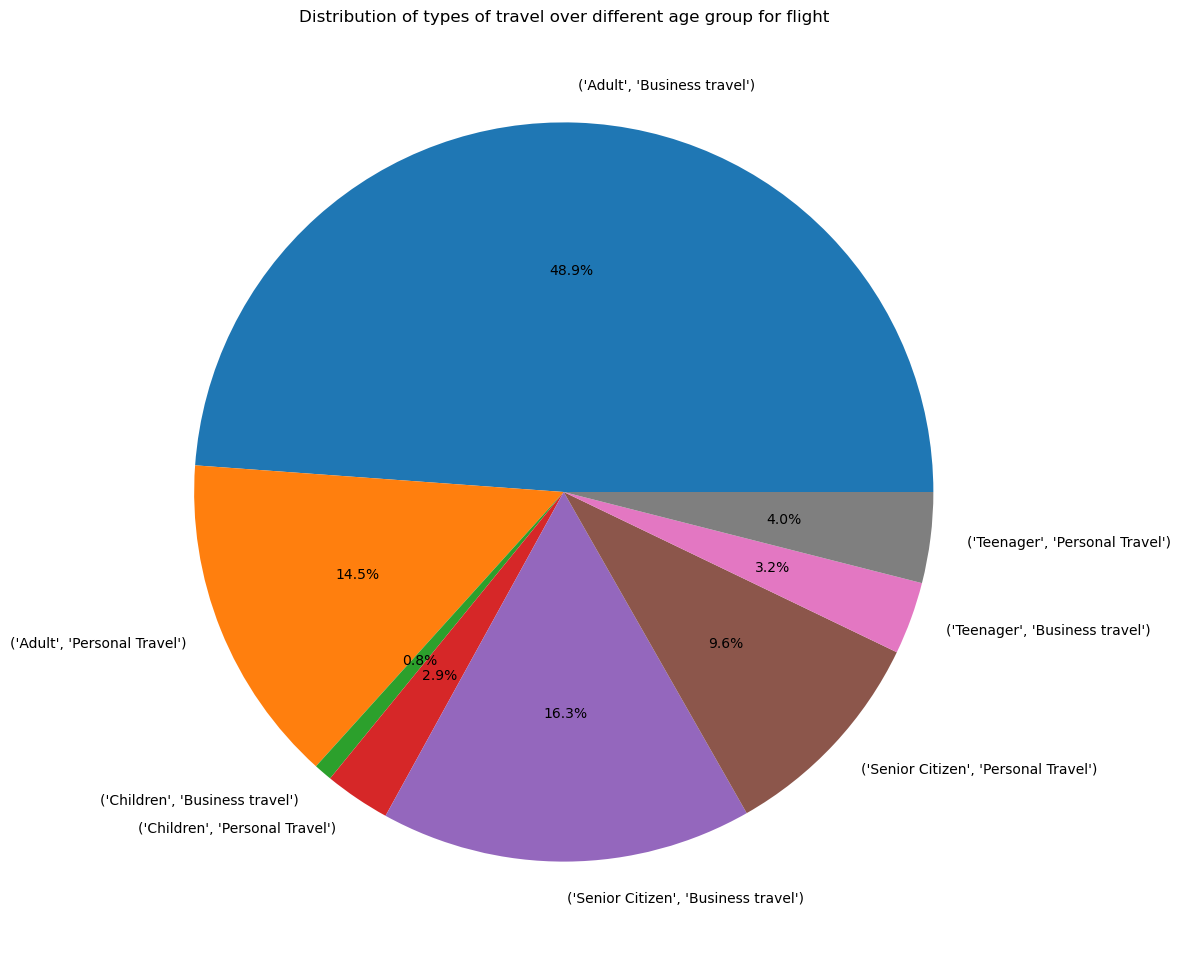

In [28]:
plt.subplots(figsize = (15,12))
plt.pie(x=v3.values,labels=v3.index,autopct='%1.1f%%')
plt.title("Distribution of types of travel over different age group for flight")
plt.show()

##### Majority of the teenagers and children do personal travel, while majority of the adults and senior citizens travel for business

#### Classification of satisfaction of customers in age groups

In [29]:
v4 = data.groupby(['Age Group','satisfaction'])['satisfaction'].count()
v4

Age Group       satisfaction
Adult           dissatisfied    37239
                satisfied       44736
Children        dissatisfied     2753
                satisfied        2018
Senior Citizen  dissatisfied    13396
                satisfied       20103
Teenager        dissatisfied     5217
                satisfied        4025
Name: satisfaction, dtype: int64

#### Visualizing the distribution of satisfaction over different age group for flight

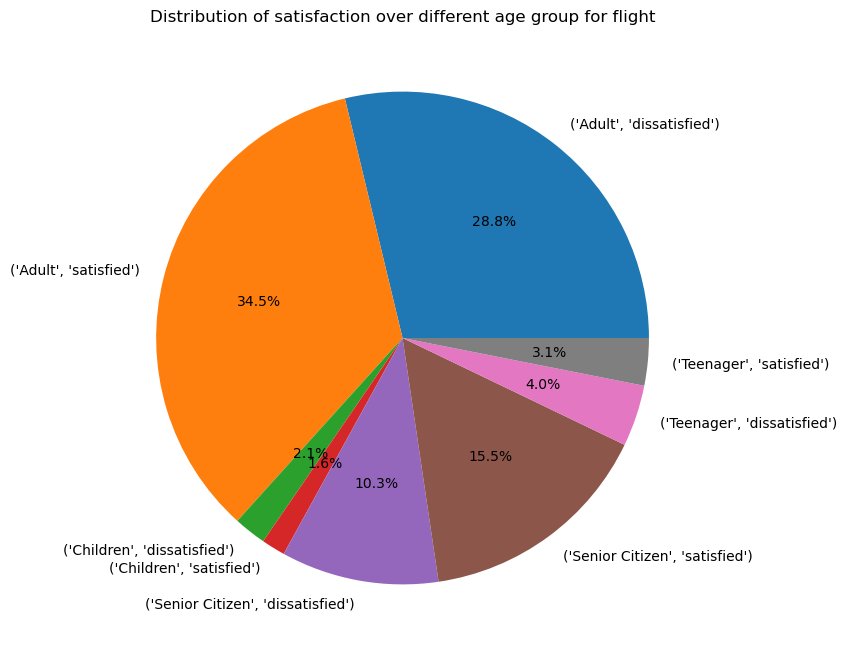

In [30]:
plt.subplots(figsize = (15,8))
plt.pie(x=v4.values,labels=v4.index,autopct='%1.1f%%')
plt.title("Distribution of satisfaction over different age group for flight")
plt.show()

##### Majority of teenagers and children are dissatisfied from the services, while majority of the adults and senior citizens are satisfied customers

### Tabulizing the categorical data for framing scenario

In [31]:
table1 = pd.crosstab([data['Age Group'],data['Gender'],data['Type of Travel']],[data['Customer Type'],data['satisfaction'],data['Class']],)
table1

Customer Type                         Loyal Customer                           \
satisfaction                            dissatisfied                satisfied   
Class                                       Business   Eco Eco Plus  Business   
Age Group      Gender Type of Travel                                            
Adult          Female Business travel           3647  1942      647     13035   
                      Personal Travel             94  1263      166       523   
               Male   Business travel           3581  1921      696     13100   
                      Personal Travel            564  6846      991        70   
Children       Female Business travel            113    36       32        67   
                      Personal Travel             19   239       44        84   
               Male   Business travel            103    37       29        67   
                      Personal Travel            104  1373      170        25   
Senior Citizen Female Business travel           1543  1044      294      6054   
                      Personal Travel             84   836      132       331   
               Male   Business travel           1527  1052      297      6073   
                      Personal Travel            373  4578      618        50   
Teenager       Female Business travel            290    78       74       359   
                      Personal Travel             37   346       41       141   
               Male   Business travel            242    90       66       327   
                      Personal Travel            137  1906      237        16   

Customer Type                                        disloyal Customer        \
satisfaction                                              dissatisfied         
Class                                   Eco Eco Plus          Business   Eco   
Age Group      Gender Type of Travel                                           
Adult          Female Business travel  1946      656              2689  4915   
                      Personal Travel  6432      827                 0    35   
               Male   Business travel  1993      668              2438  4091   
                      Personal Travel   760       99                 3    33   
Children       Female Business travel     6        6                12   191   
                      Personal Travel  1275      213                 2     5   
               Male   Business travel     6       11                19   196   
                      Personal Travel   154       16                 1     6   
Senior Citizen Female Business travel   788      217               159   331   
                      Personal Travel  4210      616                 3    26   
               Male   Business travel   788      204               166   237   
                      Personal Travel   498       59                 2    28   
Teenager       Female Business travel    47       34                18   805   
                      Personal Travel  1755      236                 2    11   
               Male   Business travel    47       50                41   714   
                      Personal Travel   233       22                 0     8   

Customer Type                                                           
satisfaction                                   satisfied                
Class                                 Eco Plus  Business  Eco Eco Plus  
Age Group      Gender Type of Travel                                    
Adult          Female Business travel      528      1602  733       51  
                      Personal Travel        0         0    7        0  
               Male   Business travel      148      1510  709       10  
                      Personal Travel        1         0    5        0  
Children       Female Business travel       18        18   22        0  
                      Personal Travel        0         0    1        0  
               Male   Business travel        3  

##### From this tabular data, only thoses scenarios are built where number of customers are more than 1000 except for the "Eco Plus Class" customers where number of customers are more than 500

In [32]:
min = data['Flight Distance'].min()
max = data['Flight Distance'].max()
min,max

(50, 6951)

##### First analyzing those customers who travel far for business purpose and the flight distance taken above 4000 km

In [33]:
def far_travellers(AgeGroup,Gender,TravelType,CustType,Satisfaction,Class):
    
    group = data[(data['Age Group']==AgeGroup)&(data['Gender']==Gender)&(data['Type of Travel']==TravelType)
     &(data['Customer Type']==CustType)&(data['satisfaction']==Satisfaction)&(data['Class']==Class)
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')
    
    print(f"There are {group.shape[0]} such customers in this group\n")
    

    print("Services which are poorly rated by this group of customers : ")
    for i in cat_num_data:
        if (group[i].value_counts().index[0]<=2):
            print(f"{i}")
            
    print("\nServices which are average rated by this group of customers : ")
    for i in cat_num_data:        
        if (group[i].value_counts().index[0]<=4) and (group[i].value_counts().index[0]>2):
            print(f"{i}") 
    print("\nServices which are best rated by this group of customers : ")        
    for i in cat_num_data:         
        if (group[i].value_counts().index[0]==5):
            print(f"{i}")
 
    for i in range(len(cat_num_data)):
        if (group[cat_num_data[i]].value_counts().index[0]<=2):
            ax = sns.countplot(group,x = cat_num_data[i])
            ax.bar_label(ax.containers[0])
            plt.title(f"Distribution of customer's rating for {cat_num_data[i]}")  
            plt.show()
    return{'Features':[AgeGroup,Gender,TravelType,CustType,Satisfaction,Class]}  
    

In [34]:
group_dict = {}

## Scenario 1:
      Service ratings of those loyal adult female customers who travel far (flight distance above 4000 km) for business purpose in business class and are dissatisfied

There are 412 such customers in this group

Services which are poorly rated by this group of customers : 
On-board service
Seat comfort
Online boarding

Services which are average rated by this group of customers : 
Ease of Online booking
Inflight wifi service
Inflight entertainment
Leg room service
Cleanliness
Baggage handling
Checkin service
Online support

Services which are best rated by this group of customers : 
Departure/Arrival time convenient
Gate location
Food and drink


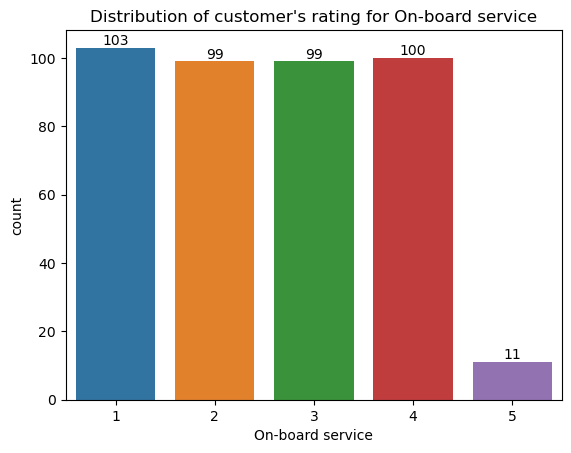

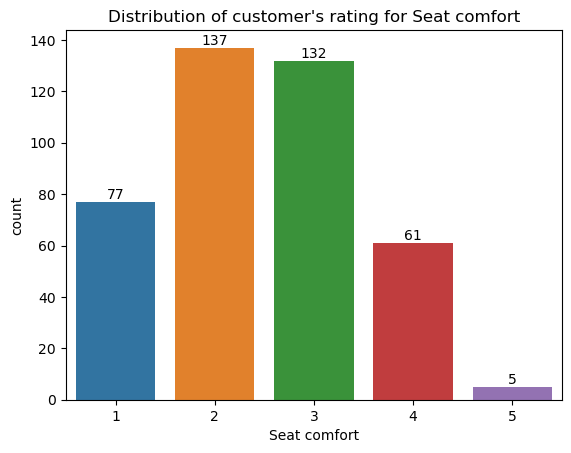

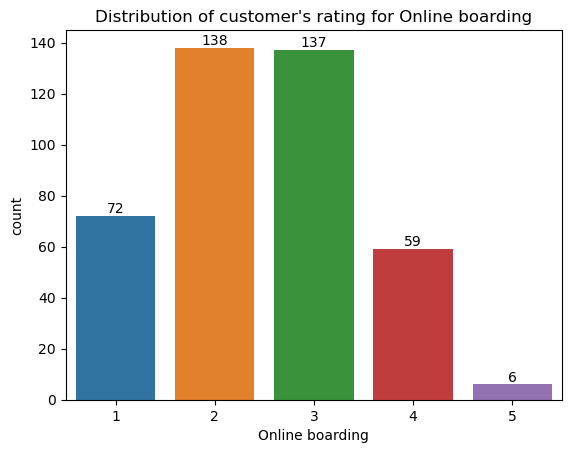

In [35]:
group_dict['Group 1'] = far_travellers('Adult','Female','Business travel','Loyal Customer','dissatisfied','Business')

## Scenario 2:
      Service ratings of those loyal adult male customers who travel far (flight distance above 4000 km) for business purpose in business class and are dissatisfied

There are 397 such customers in this group

Services which are poorly rated by this group of customers : 
Ease of Online booking
Seat comfort
Checkin service
Online support

Services which are average rated by this group of customers : 
Inflight wifi service
On-board service
Inflight entertainment
Leg room service
Cleanliness
Baggage handling
Online boarding

Services which are best rated by this group of customers : 
Departure/Arrival time convenient
Gate location
Food and drink


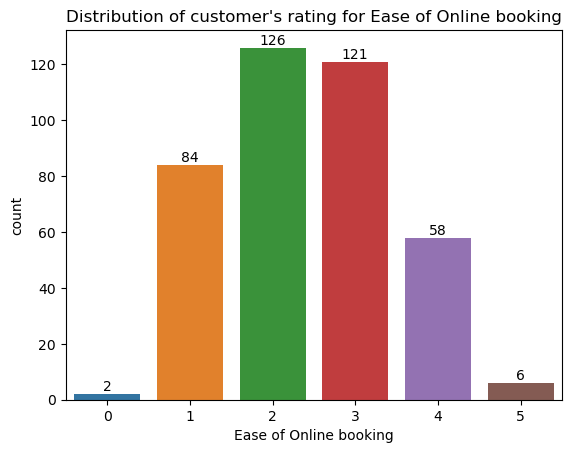

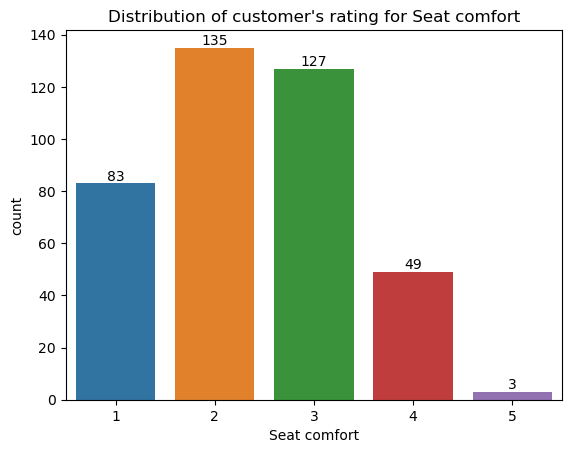

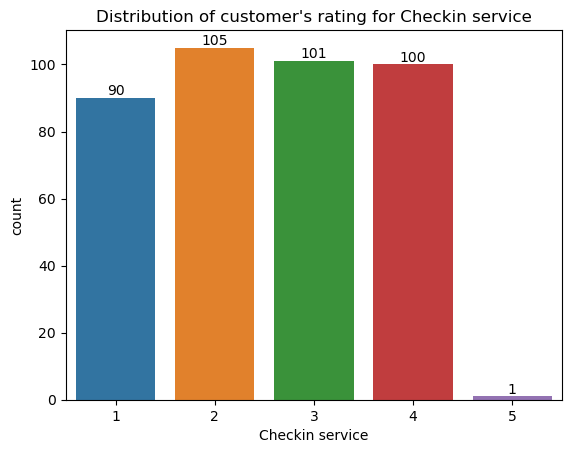

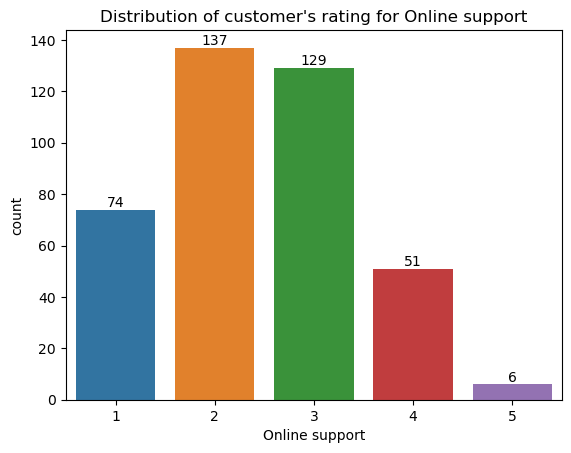

In [36]:
group_dict['Group 2'] = far_travellers('Adult','Male','Business travel','Loyal Customer','dissatisfied','Business')

## Scenario 3:
      Service ratings of those loyal senior citizen female customers who travel far (flight distance above 4000 km) for business purpose in business class and are dissatisfied

There are 25 such customers in this group

Services which are poorly rated by this group of customers : 
Inflight wifi service
Cleanliness
Checkin service
Online boarding

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
On-board service
Seat comfort
Inflight entertainment
Gate location
Leg room service
Food and drink
Baggage handling
Online support

Services which are best rated by this group of customers : 


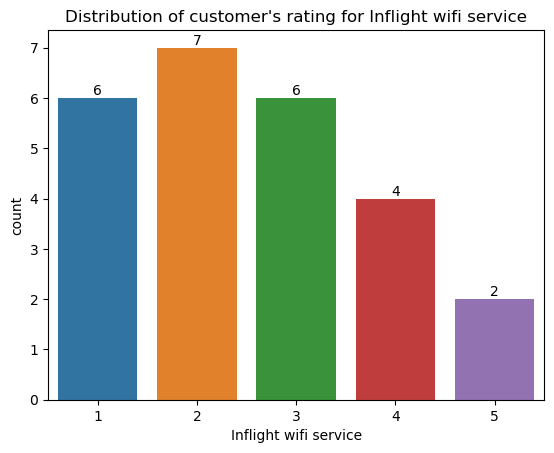

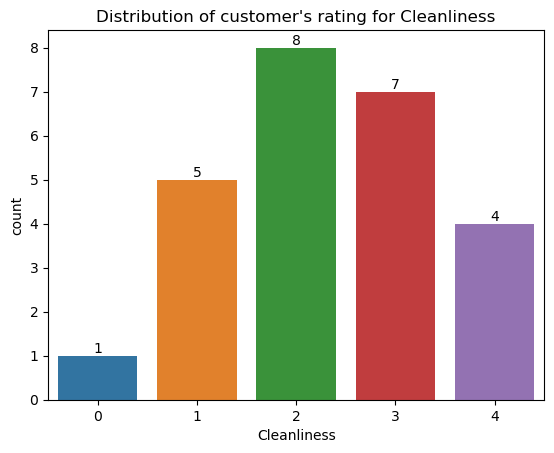

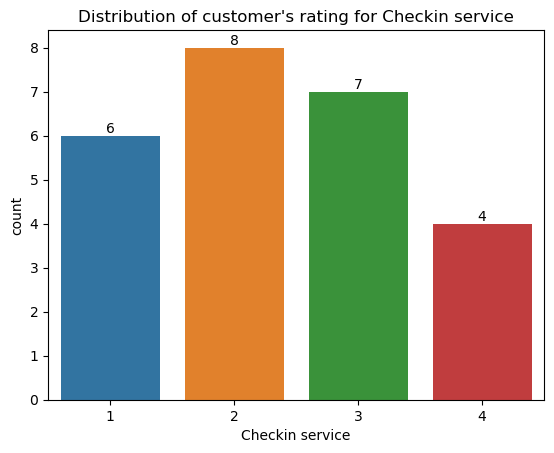

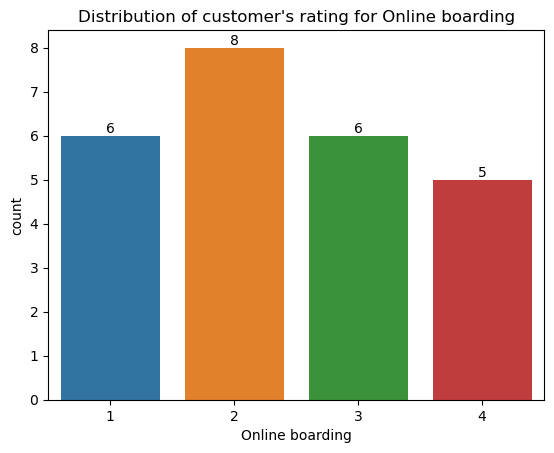

In [37]:
group_dict['Group 3'] = far_travellers('Senior Citizen','Female','Business travel','Loyal Customer','dissatisfied','Business')

## Scenario 4:
      Service ratings of those loyal senior citizen male customers who travel far (flight distance above 4000 km) for business purpose in business class and are dissatisfied

There are 19 such customers in this group

Services which are poorly rated by this group of customers : 
Online boarding

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
On-board service
Seat comfort
Inflight entertainment
Leg room service
Cleanliness
Baggage handling
Checkin service
Online support

Services which are best rated by this group of customers : 
Gate location
Food and drink


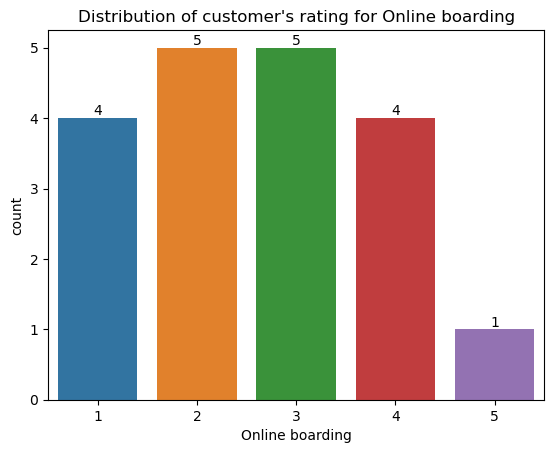

In [38]:
group_dict['Group 4'] = far_travellers('Senior Citizen','Male','Business travel','Loyal Customer','dissatisfied','Business')

## Scenario 5:
    Service ratings of those disloyal adult female customers who travel far (flight distance above 4000 km) for business purpose in business class and are dissatisfied


There are 39 such customers in this group

Services which are poorly rated by this group of customers : 
Departure/Arrival time convenient
Seat comfort
Food and drink

Services which are average rated by this group of customers : 
Ease of Online booking
Inflight wifi service
On-board service
Inflight entertainment
Gate location
Cleanliness
Checkin service
Online support
Online boarding

Services which are best rated by this group of customers : 
Leg room service
Baggage handling


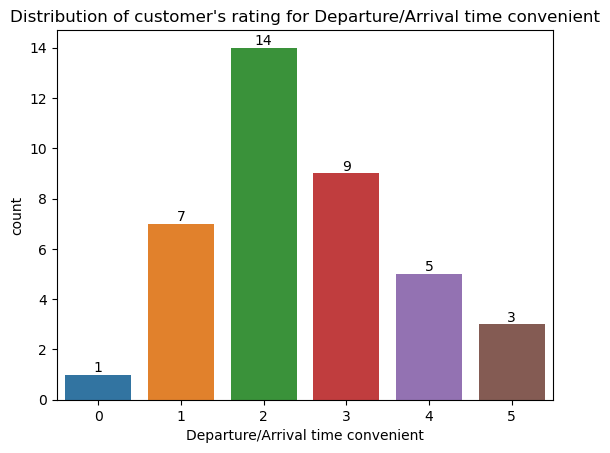

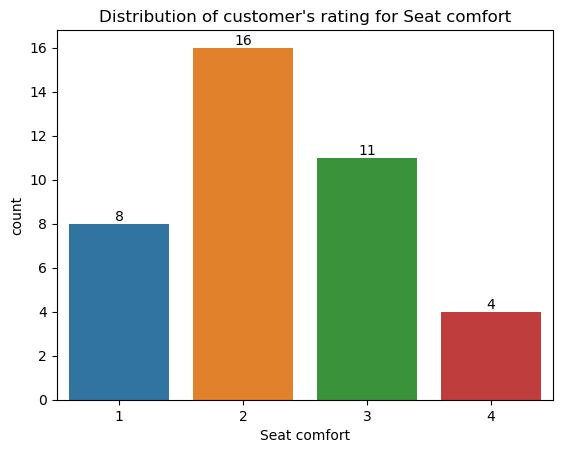

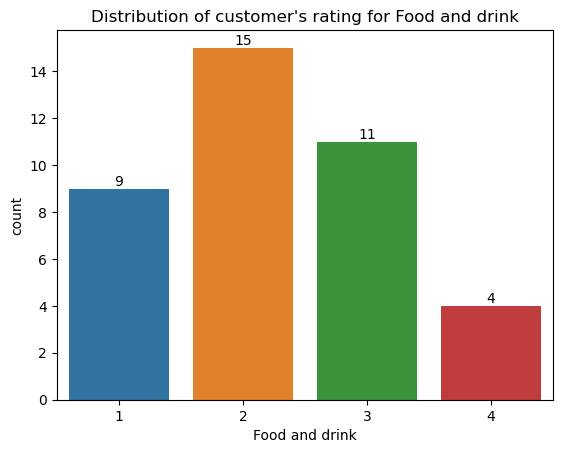

In [39]:
group_dict['Group 5'] = far_travellers('Adult','Female','Business travel','disloyal Customer','dissatisfied','Business')

## Scenario 6 :
    Service ratings of those disloyal adult male customers who travel far (flight distance above 4000 km) for business purpose in business class and are dissatisfied


There are 37 such customers in this group

Services which are poorly rated by this group of customers : 
Inflight wifi service

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
On-board service
Seat comfort
Inflight entertainment
Gate location
Leg room service
Cleanliness
Food and drink
Baggage handling
Checkin service

Services which are best rated by this group of customers : 
Online support
Online boarding


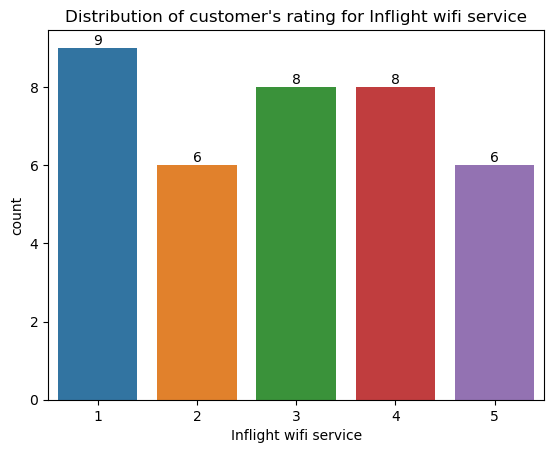

In [40]:
group_dict['Group 6'] = far_travellers('Adult','Male','Business travel','disloyal Customer','dissatisfied','Business')

## Scenario 7 : 
    Service ratings of those disloyal adult female customers who travel far (flight distance above 4000 km) for business purpose in business class and are satisfied


There are 9 such customers in this group

Services which are poorly rated by this group of customers : 
Ease of Online booking
Inflight wifi service
Online support
Online boarding

Services which are average rated by this group of customers : 
Departure/Arrival time convenient
On-board service
Inflight entertainment
Gate location
Baggage handling
Checkin service

Services which are best rated by this group of customers : 
Seat comfort
Leg room service
Cleanliness
Food and drink


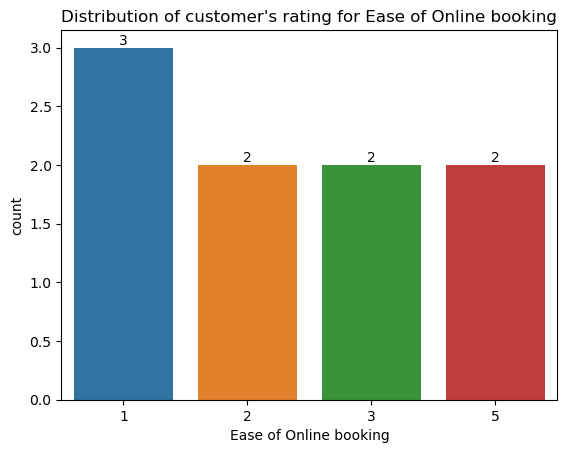

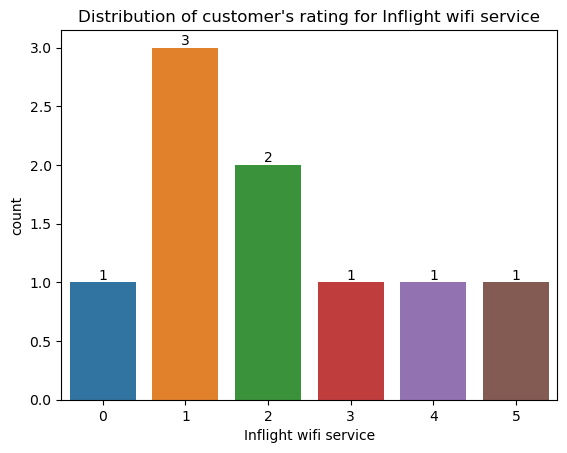

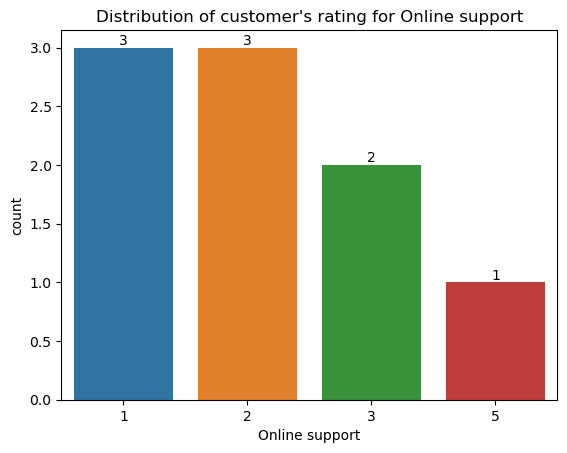

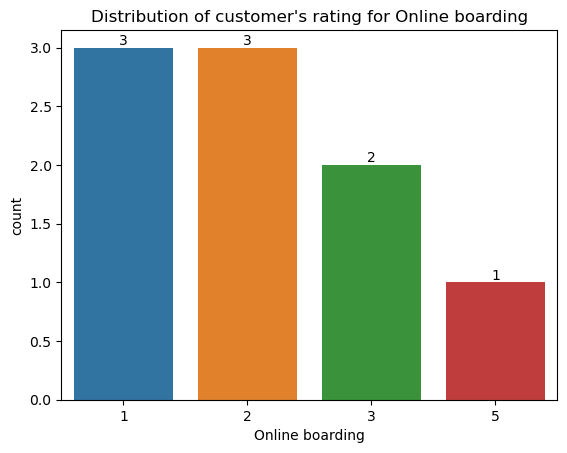

In [41]:
group_dict['Group 7'] = far_travellers('Adult','Female','Business travel','disloyal Customer','satisfied','Business')

## Scenario 8 : 
    Service ratings of those disloyal adult female customers who travel far (flight distance above 4000 km) for business purpose in eco class and are dissatisfied


There are 33 such customers in this group

Services which are poorly rated by this group of customers : 
Departure/Arrival time convenient
Seat comfort
Inflight entertainment
Leg room service
Food and drink
Checkin service
Online support
Online boarding

Services which are average rated by this group of customers : 
Ease of Online booking
Inflight wifi service
On-board service
Gate location
Cleanliness
Baggage handling

Services which are best rated by this group of customers : 


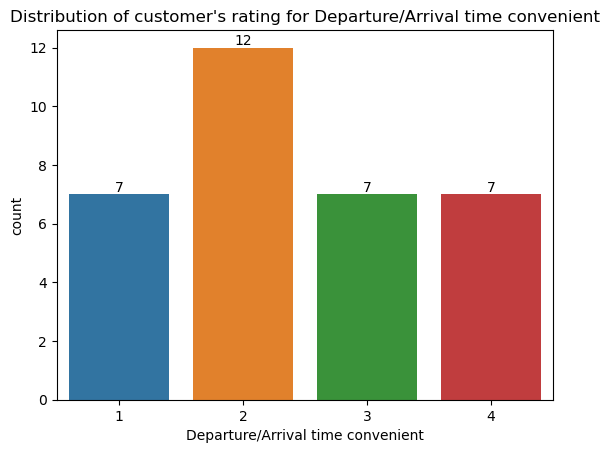

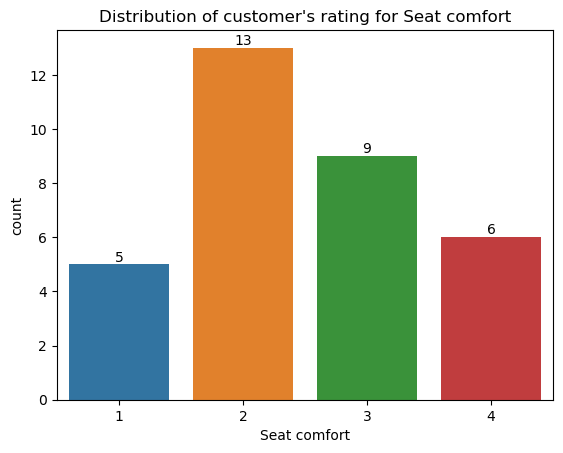

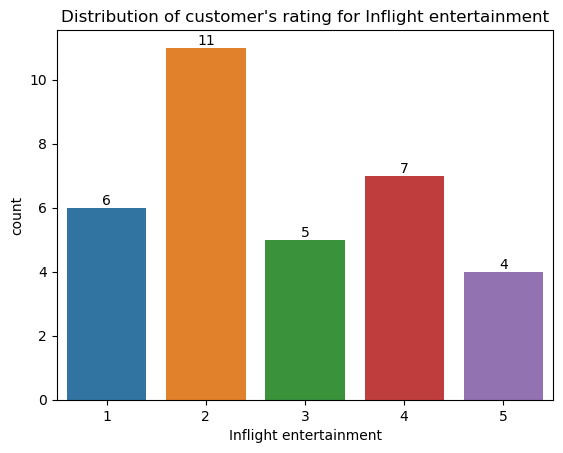

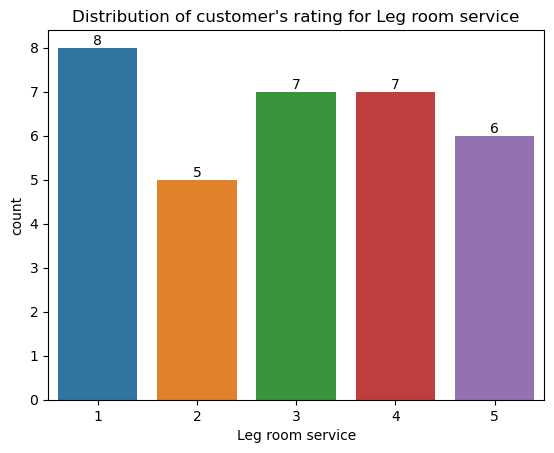

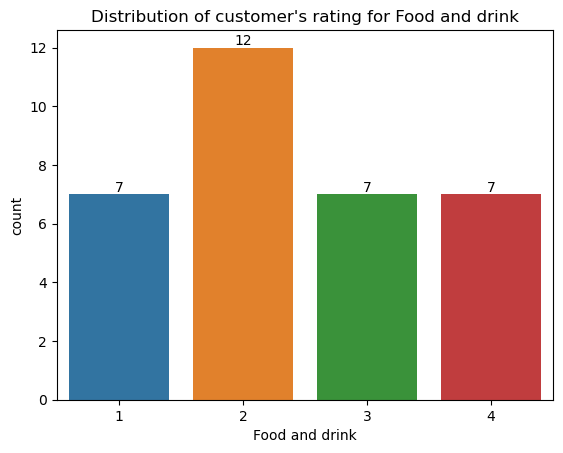

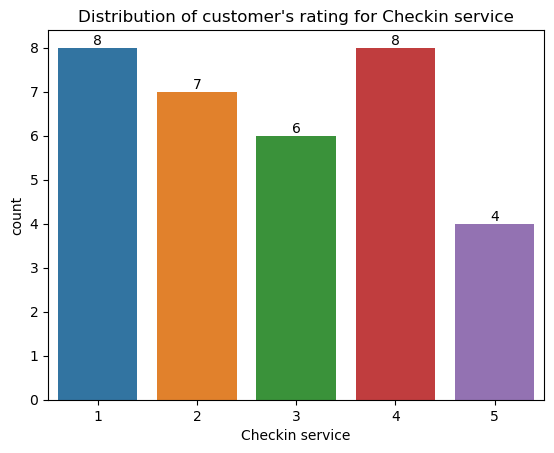

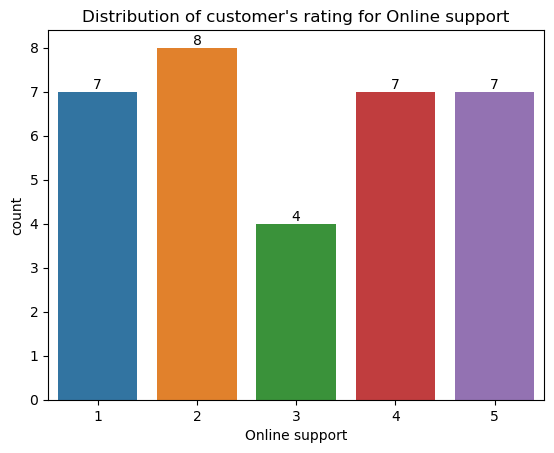

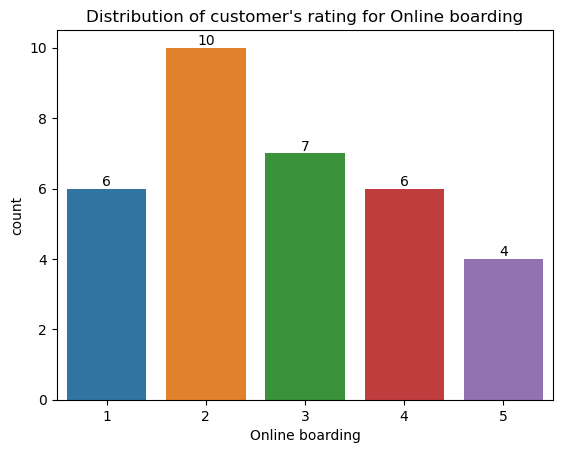

In [42]:
group_dict['Group 8'] = far_travellers('Adult','Female','Business travel','disloyal Customer','dissatisfied','Eco')

## Scenario 9 : 
    Service ratings of those disloyal adult male customers who travel far (flight distance above 4000 km) for business purpose in eco class and are dissatisfied


There are 12 such customers in this group

Services which are poorly rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
Seat comfort
Inflight entertainment
Leg room service
Food and drink
Online boarding

Services which are average rated by this group of customers : 
On-board service
Gate location
Cleanliness
Baggage handling

Services which are best rated by this group of customers : 
Checkin service
Online support


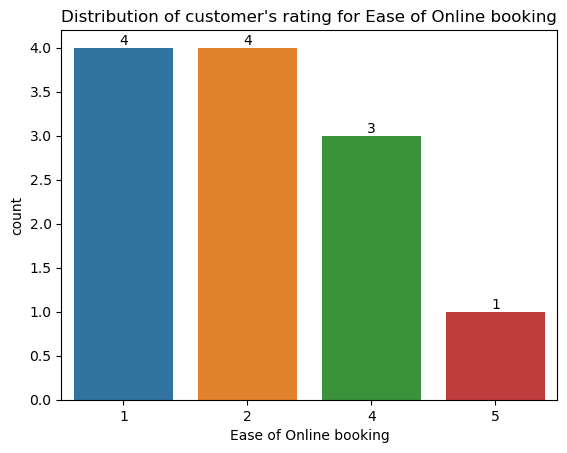

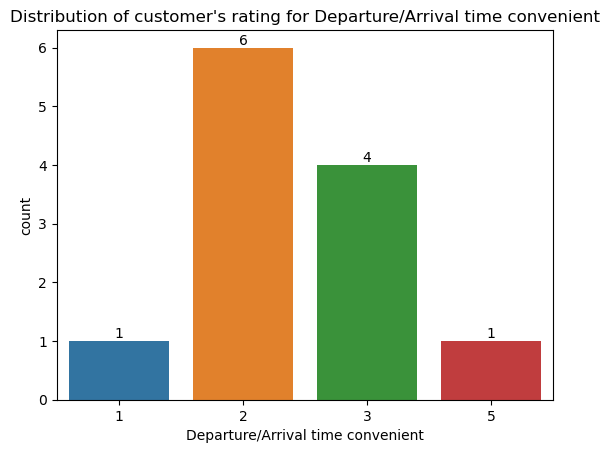

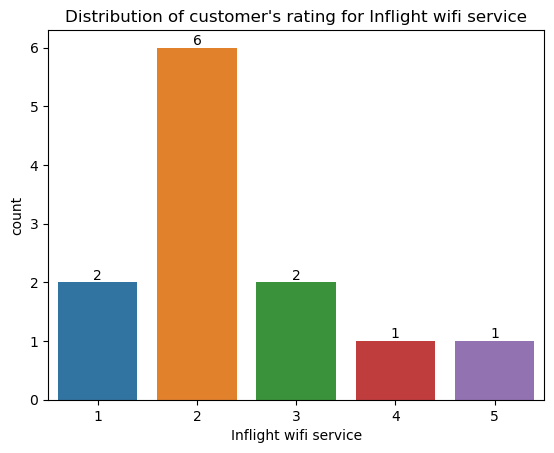

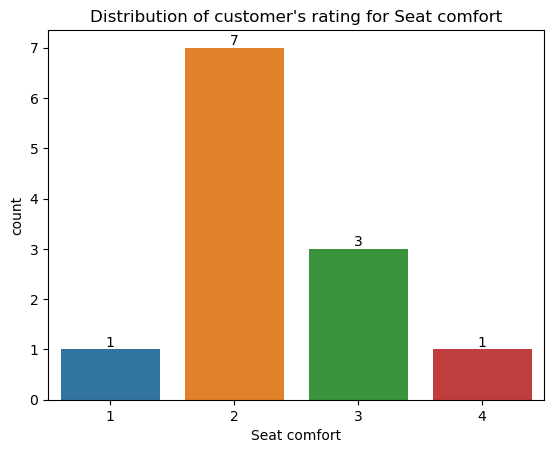

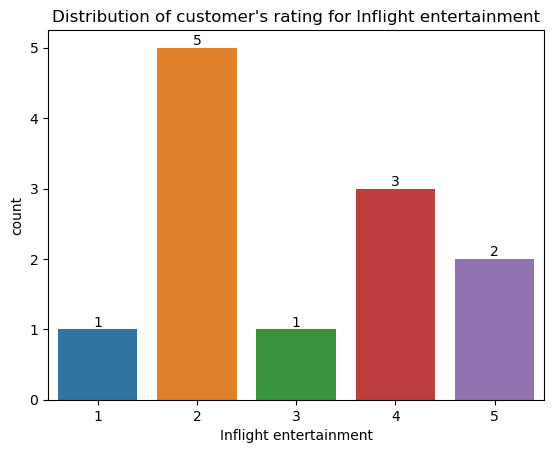

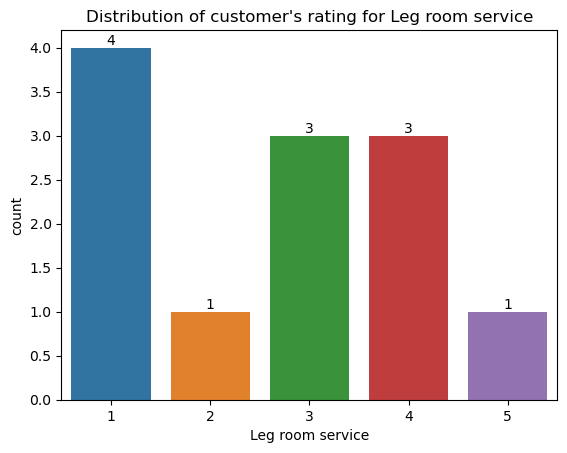

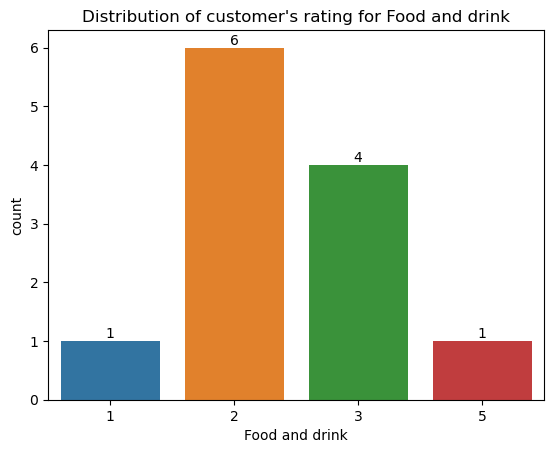

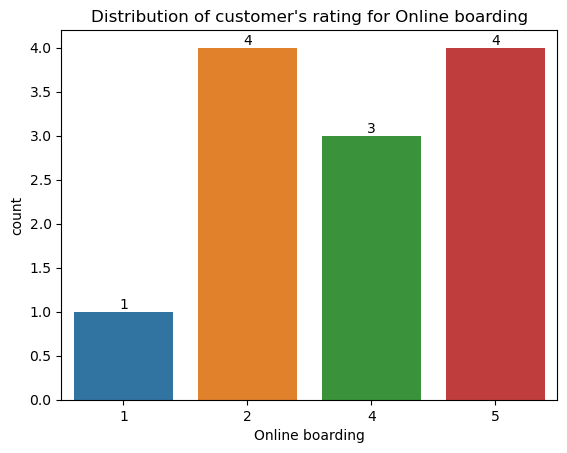

In [43]:
group_dict['Group 9'] = far_travellers('Adult','Male','Business travel','disloyal Customer','dissatisfied','Eco')

## Scenario 10 :
    Service ratings of those loyal adult female customers who travel far (flight distance above 4000 km) for business purpose in eco plus class and are dissatisfied


There are 6 such customers in this group

Services which are poorly rated by this group of customers : 
Departure/Arrival time convenient
Gate location
Food and drink
Checkin service

Services which are average rated by this group of customers : 
Ease of Online booking
Inflight wifi service
Seat comfort
Inflight entertainment
Leg room service
Cleanliness
Baggage handling
Online support
Online boarding

Services which are best rated by this group of customers : 
On-board service


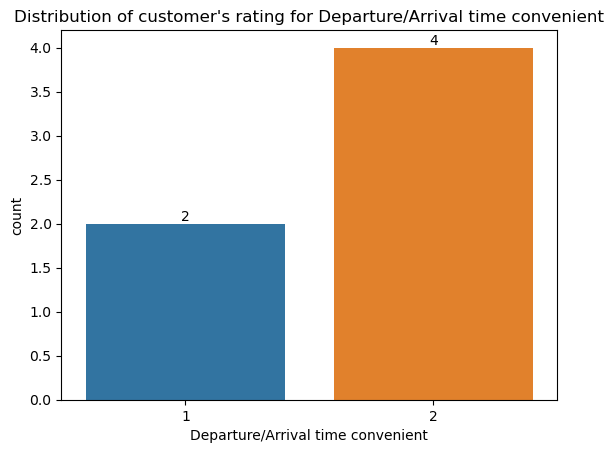

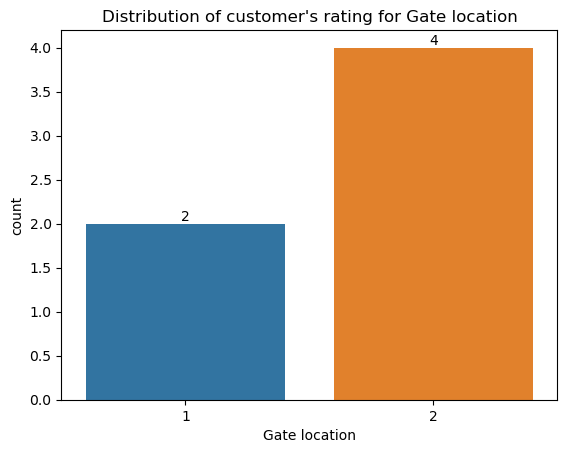

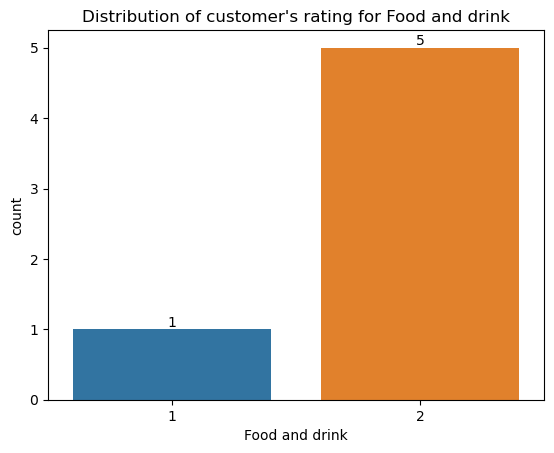

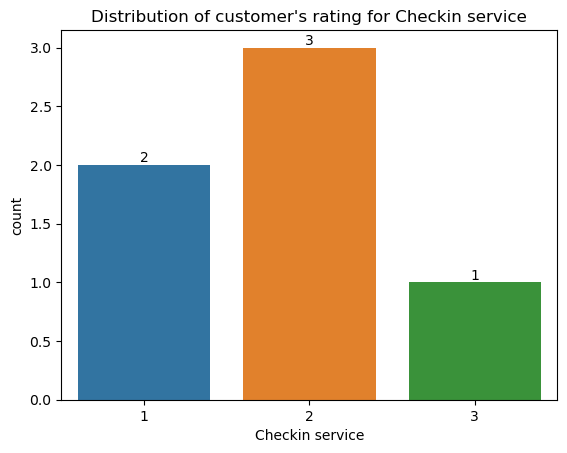

In [44]:
group_dict['Group 10'] = far_travellers('Adult','Female','Business travel','Loyal Customer','dissatisfied','Eco Plus')

## Scenario 11 :
    Service ratings of those loyal adult male customers who travel far (flight distance above 4000 km) for business purpose in eco plus class and are dissatisfied


There are 7 such customers in this group

Services which are poorly rated by this group of customers : 
Inflight wifi service
Seat comfort
Inflight entertainment
Checkin service
Online support
Online boarding

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Gate location
Leg room service
Cleanliness
Baggage handling

Services which are best rated by this group of customers : 
On-board service
Food and drink


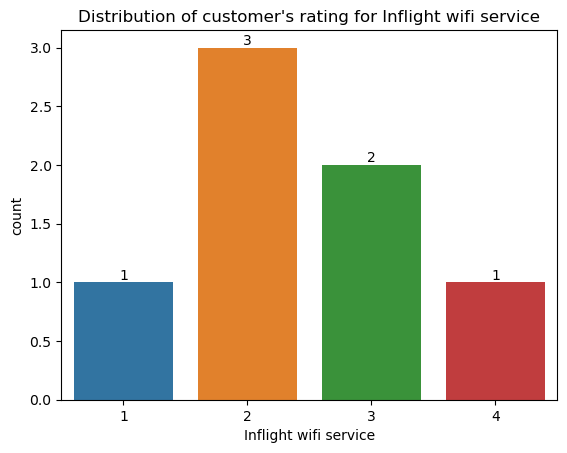

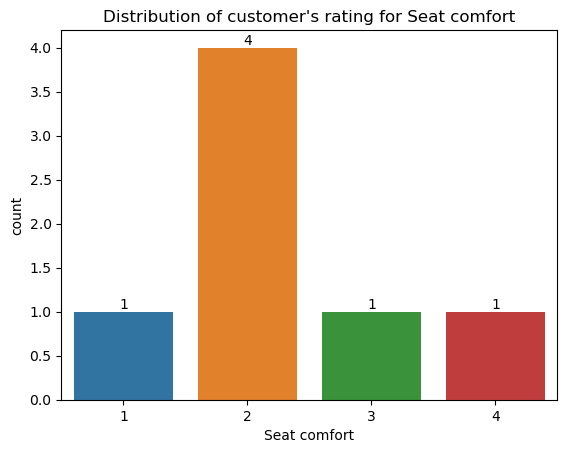

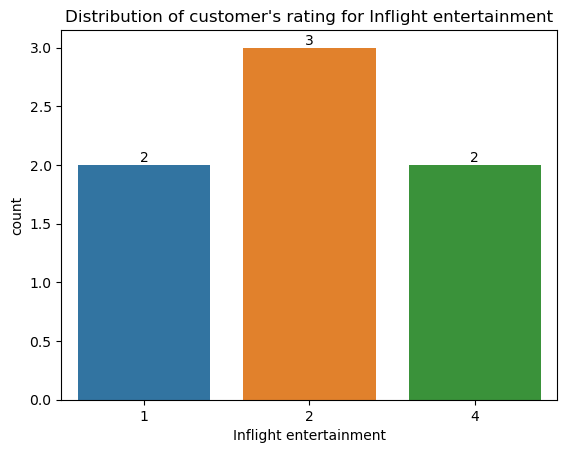

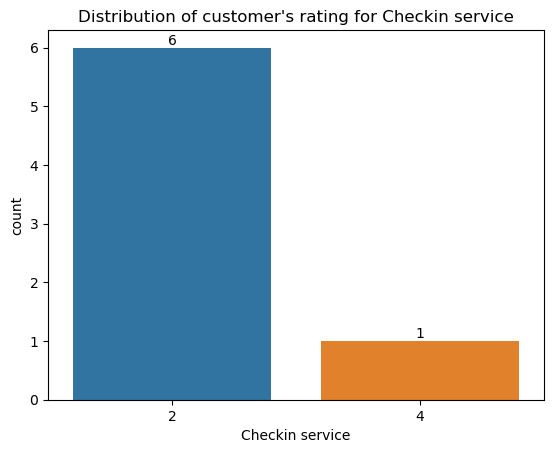

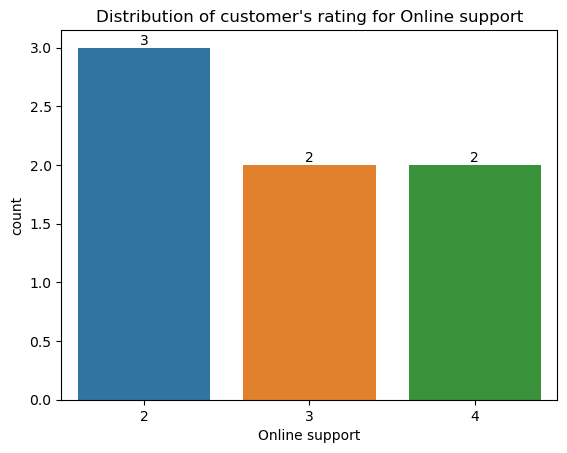

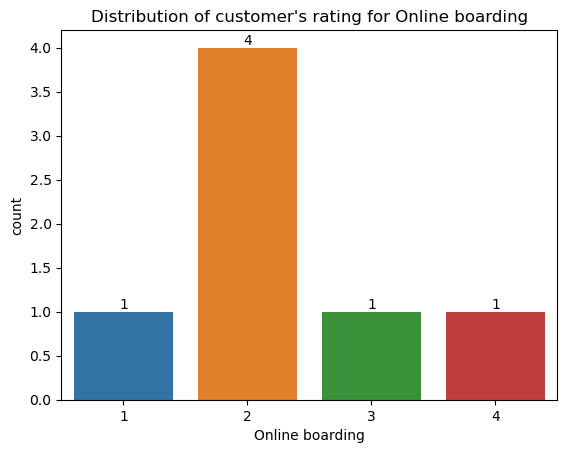

In [45]:
group_dict['Group 11'] = far_travellers('Adult','Male','Business travel','Loyal Customer','dissatisfied','Eco Plus')

## Scenario 12 : 
    Service ratings of those loyal adult female customers who travel far (flight distance above 4000 km) for business purpose in eco plus class and are satisfied


There are 9 such customers in this group

Services which are poorly rated by this group of customers : 
Ease of Online booking
Seat comfort
Leg room service
Cleanliness
Food and drink

Services which are average rated by this group of customers : 
Inflight entertainment
Gate location
Checkin service

Services which are best rated by this group of customers : 
Departure/Arrival time convenient
Inflight wifi service
On-board service
Baggage handling
Online support
Online boarding


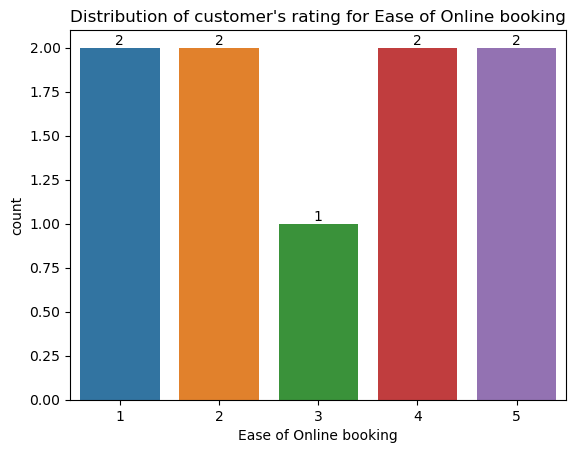

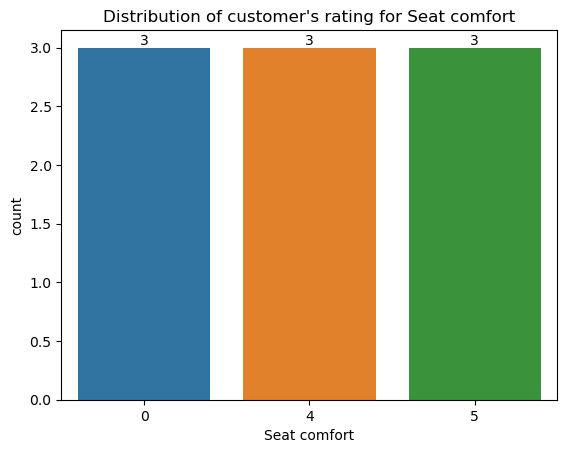

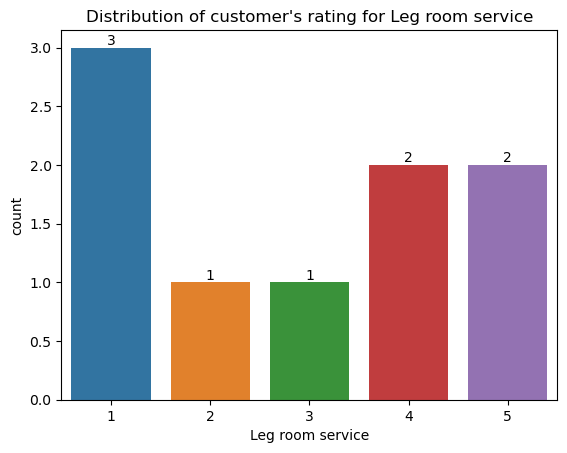

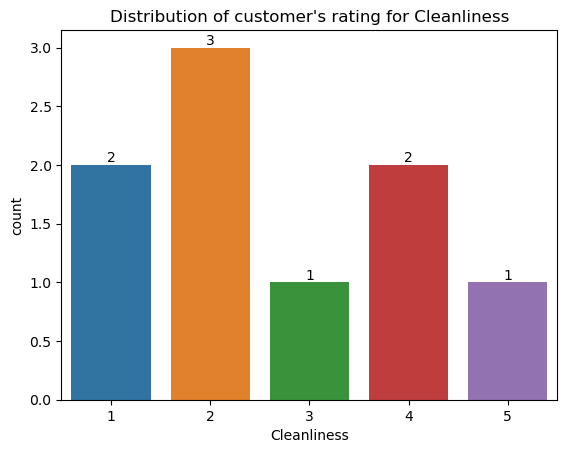

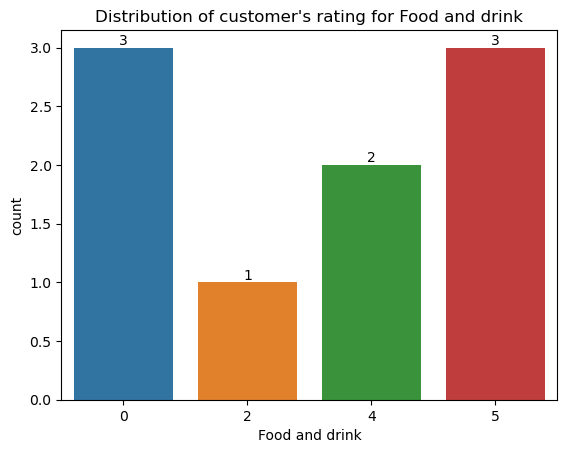

In [46]:
group_dict['Group 12'] = far_travellers('Adult','Female','Business travel','Loyal Customer','satisfied','Eco Plus')

## Scenario 13 : 
    Service ratings of those loyal adult male customers who travel far (flight distance above 4000 km) for business purpose in eco plus class and are satisfied


There are 8 such customers in this group

Services which are poorly rated by this group of customers : 
On-board service

Services which are average rated by this group of customers : 
Ease of Online booking
Inflight entertainment
Leg room service
Cleanliness
Online support
Online boarding

Services which are best rated by this group of customers : 
Departure/Arrival time convenient
Inflight wifi service
Seat comfort
Gate location
Food and drink
Baggage handling
Checkin service


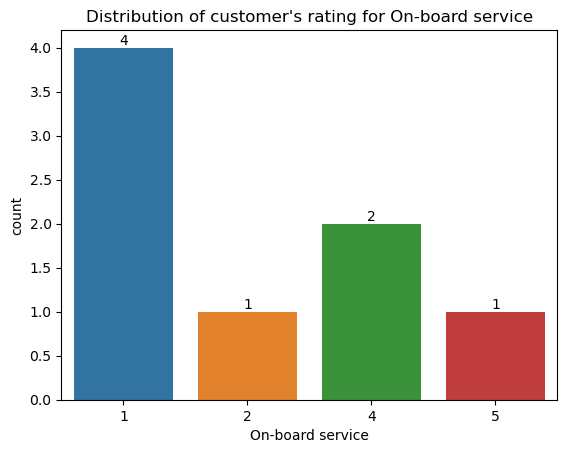

In [47]:
group_dict['Group 13'] = far_travellers('Adult','Male','Business travel','Loyal Customer','satisfied','Eco Plus')

## Scenario 14 : 
    Service ratings of those disloyal adult female customers who travel far (flight distance above 4000 km) for business purpose in eco plus class and are dissatisfied

There are 3 such customers in this group

Services which are poorly rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Leg room service

Services which are average rated by this group of customers : 
Inflight wifi service
Seat comfort
Cleanliness
Food and drink
Baggage handling
Checkin service

Services which are best rated by this group of customers : 
On-board service
Inflight entertainment
Gate location
Online support
Online boarding


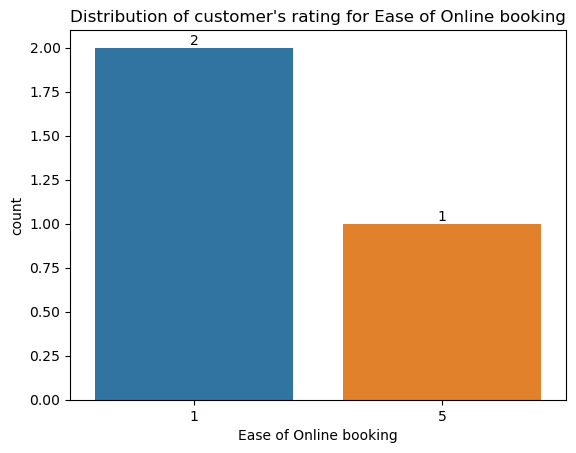

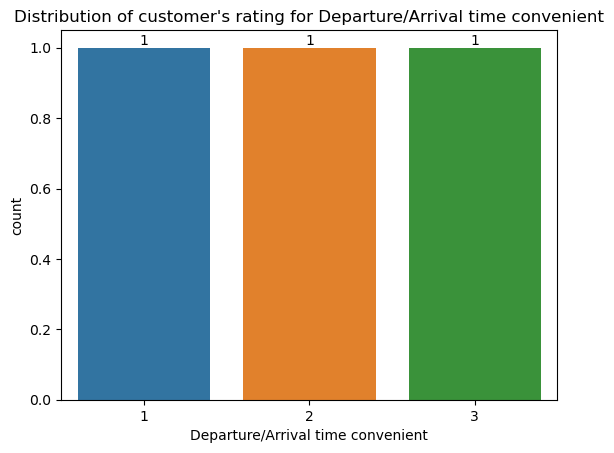

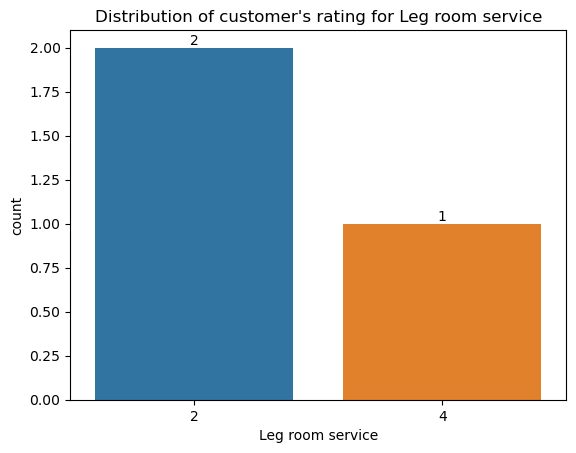

In [48]:
group_dict['Group 14'] = far_travellers('Adult','Female','Business travel','disloyal Customer','dissatisfied','Eco Plus')

In [49]:
for key in group_dict:
    print(f"{key} -> {group_dict.get(key)}\n")
        

Group 1 -> {'Features': ['Adult', 'Female', 'Business travel', 'Loyal Customer', 'dissatisfied', 'Business']}

Group 2 -> {'Features': ['Adult', 'Male', 'Business travel', 'Loyal Customer', 'dissatisfied', 'Business']}

Group 3 -> {'Features': ['Senior Citizen', 'Female', 'Business travel', 'Loyal Customer', 'dissatisfied', 'Business']}

Group 4 -> {'Features': ['Senior Citizen', 'Male', 'Business travel', 'Loyal Customer', 'dissatisfied', 'Business']}

Group 5 -> {'Features': ['Adult', 'Female', 'Business travel', 'disloyal Customer', 'dissatisfied', 'Business']}

Group 6 -> {'Features': ['Adult', 'Male', 'Business travel', 'disloyal Customer', 'dissatisfied', 'Business']}

Group 7 -> {'Features': ['Adult', 'Female', 'Business travel', 'disloyal Customer', 'satisfied', 'Business']}

Group 8 -> {'Features': ['Adult', 'Female', 'Business travel', 'disloyal Customer', 'dissatisfied', 'Eco']}

Group 9 -> {'Features': ['Adult', 'Male', 'Business travel', 'disloyal Customer', 'dissatisfied'

##### Group 12 and Group 13 have loyal and satisfied customers who are travelling for their business purpose, but still they did not liked some of the services of Eco Plus Class.

In [50]:
group1 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group2 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group3 = data[(data['Age Group']=='Senior Citizen')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group4 = data[(data['Age Group']=='Senior Citizen')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group5 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group6 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group7 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='satisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group8 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Eco')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group9 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Eco')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group10 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Eco Plus')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group11 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Eco Plus')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group12 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='satisfied')&(data['Class']=='Eco Plus')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group13 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='satisfied')&(data['Class']=='Eco Plus')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group14 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Eco Plus')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')                  
       

In [51]:

all_groups = [group1,group2,group3,group4,group5,group6,group7,group8,group9,group10,group11,group14]

poor_ratings = []
for grp in all_groups:
    for i in cat_num_data:
        if (grp[i].value_counts().index[0]<=2):
            poor_ratings.append(i)

set_ratings = set(poor_ratings)

print("Services require improvement for those customers who are either dissatisfied or disloyal or both\n")
for j in set_ratings:
    if poor_ratings.count(j)>4:
        print(f"{j}")

        

Services require improvement for those customers who are either dissatisfied or disloyal or both

Departure/Arrival time convenient
Inflight wifi service
Seat comfort
Online boarding
Checkin service


In [52]:
eco_plus_sat_group = [group12,group13]
poor_ratings = []
for grp in eco_plus_sat_group:
    for i in cat_num_data:
        if (grp[i].value_counts().index[0]<=2):
            poor_ratings.append(i)

set_ratings = set(poor_ratings)

print("Services require improvement for Eco Plus Satisfied Customers\n")
for j in set_ratings:
    if poor_ratings.count(j)>=1:
        print(f"{j}")


Services require improvement for Eco Plus Satisfied Customers

Ease of Online booking
On-board service
Seat comfort
Leg room service
Cleanliness
Food and drink


## Scenario 15 :
    Service ratings of those disloyal adult male customers who travel far (flight distance above 4000 above) for business purpose in business class and are satisfied


In [53]:
group_dict['Group 15'] = far_travellers('Adult','Male','Business travel','disloyal Customer','satisfied','Business')

There are 10 such customers in this group

Services which are poorly rated by this group of customers : 

Services which are average rated by this group of customers : 
On-board service
Gate location
Cleanliness

Services which are best rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
Seat comfort
Inflight entertainment
Leg room service
Food and drink
Baggage handling
Checkin service
Online support
Online boarding


## Scenario 16 :
    Service ratings of those loyal adult female customers who travel far (flight distance above 4000 km) for business purpose in business class and are satisfied


In [54]:
group_dict['Group 16'] = far_travellers('Adult','Female','Business travel','Loyal Customer','satisfied','Business')

There are 930 such customers in this group

Services which are poorly rated by this group of customers : 

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
Seat comfort
Inflight entertainment
Gate location
Leg room service
Cleanliness
Food and drink
Checkin service
Online support
Online boarding

Services which are best rated by this group of customers : 
On-board service
Baggage handling


## Scenario 17 :
    Service ratings of those loyal adult male customers who travel far (flight distance above 4000 km) for business purpose in business class and are satisfied


In [55]:
group_dict['Group 17'] = far_travellers('Adult','Male','Business travel','Loyal Customer','satisfied','Business')

There are 1064 such customers in this group

Services which are poorly rated by this group of customers : 

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
On-board service
Seat comfort
Inflight entertainment
Gate location
Leg room service
Food and drink
Baggage handling
Online support
Online boarding

Services which are best rated by this group of customers : 
Cleanliness
Checkin service


## Scenario 18 : 
    Service ratings of those loyal senior citizen female customers who travel far (flight distance above 4000 km) for business purpose in business class and are satisfied


In [56]:
group_dict['Group 18'] = far_travellers('Senior Citizen','Female','Business travel','Loyal Customer','satisfied','Business')

There are 75 such customers in this group

Services which are poorly rated by this group of customers : 

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Seat comfort
Gate location
Cleanliness
Food and drink

Services which are best rated by this group of customers : 
Inflight wifi service
On-board service
Inflight entertainment
Leg room service
Baggage handling
Checkin service
Online support
Online boarding


## Scenario 19 : 
    Service ratings of those loyal senior citizen male customers who travel far (flight distance above 4000 km) for business purpose in business class and are satisfied


In [57]:
group_dict['Group 19'] = far_travellers('Senior Citizen','Male','Business travel','Loyal Customer','satisfied','Business')

There are 86 such customers in this group

Services which are poorly rated by this group of customers : 

Services which are average rated by this group of customers : 
Inflight wifi service
Baggage handling

Services which are best rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
On-board service
Seat comfort
Inflight entertainment
Gate location
Leg room service
Cleanliness
Food and drink
Checkin service
Online support
Online boarding


In [58]:

list_g = list(group_dict.items())

print("These are the satisfied groups who did not rated any of the services poorly\n")

for i in range(len(list_g)):
    if i+14<19:
        print(list_g[i+14])
        

These are the satisfied groups who did not rated any of the services poorly

('Group 15', {'Features': ['Adult', 'Male', 'Business travel', 'disloyal Customer', 'satisfied', 'Business']})
('Group 16', {'Features': ['Adult', 'Female', 'Business travel', 'Loyal Customer', 'satisfied', 'Business']})
('Group 17', {'Features': ['Adult', 'Male', 'Business travel', 'Loyal Customer', 'satisfied', 'Business']})
('Group 18', {'Features': ['Senior Citizen', 'Female', 'Business travel', 'Loyal Customer', 'satisfied', 'Business']})
('Group 19', {'Features': ['Senior Citizen', 'Male', 'Business travel', 'Loyal Customer', 'satisfied', 'Business']})


##### We discovered the improvement area for those customers who travel for long route. Now, let's discover those scenarios, where flight distance is in between 1000 km and 4000 km

### New Helper Function for flight distance between 1000 km and 4000 km

In [59]:
def travellers(AgeGroup,Gender,TravelType,CustType,Satisfaction,Class):
    
    group = data[(data['Age Group']==AgeGroup)&(data['Gender']==Gender)&(data['Type of Travel']==TravelType)
     &(data['Customer Type']==CustType)&(data['satisfaction']==Satisfaction)&(data['Class']==Class)
     &(data['Flight Distance']>=2000) & (data['Flight Distance']<=4000)].sort_values(by = 'Flight Distance')
    
    print(f"There are {group.shape[0]} such customers in this group\n")
    

    print("Services which are poorly rated by this group of customers : ")
    for i in cat_num_data:
        if (group[i].value_counts().index[0]<=2):
            print(f"{i}")
            
    print("\nServices which are average rated by this group of customers : ")
    for i in cat_num_data:        
        if (group[i].value_counts().index[0]<=4) and (group[i].value_counts().index[0]>2):
            print(f"{i}") 
    print("\nServices which are best rated by this group of customers : ")        
    for i in cat_num_data:         
        if (group[i].value_counts().index[0]==5):
            print(f"{i}")
 
    for i in range(len(cat_num_data)):
        if (group[cat_num_data[i]].value_counts().index[0]<=2):
            ax = sns.countplot(group,x = cat_num_data[i])
            ax.bar_label(ax.containers[0])
            plt.title(f"Distribution of customer's rating for {cat_num_data[i]}")  
            plt.show()
    return{'Features':[AgeGroup,Gender,TravelType,CustType,Satisfaction,Class]}  
    

In [60]:
group_dict2 = {}

## Scenario 20 :
    Service ratings of those loyal adult female customers who travel for business purpose in business class and are dissatisfied (flight distance between 1000 km and 4000 km)


There are 1849 such customers in this group

Services which are poorly rated by this group of customers : 
Ease of Online booking
Inflight wifi service
On-board service
Seat comfort

Services which are average rated by this group of customers : 
Departure/Arrival time convenient
Inflight entertainment
Gate location
Leg room service
Cleanliness
Food and drink
Baggage handling
Checkin service
Online support
Online boarding

Services which are best rated by this group of customers : 


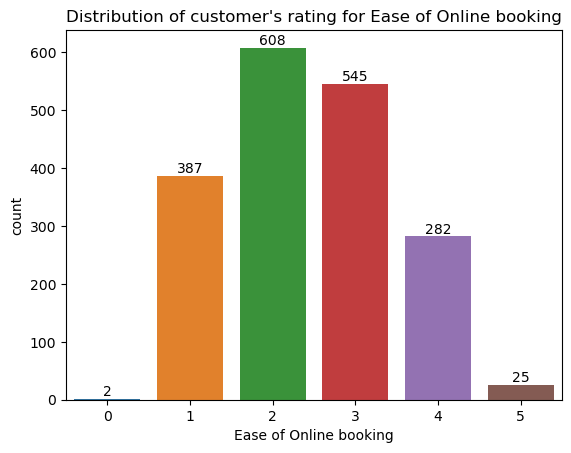

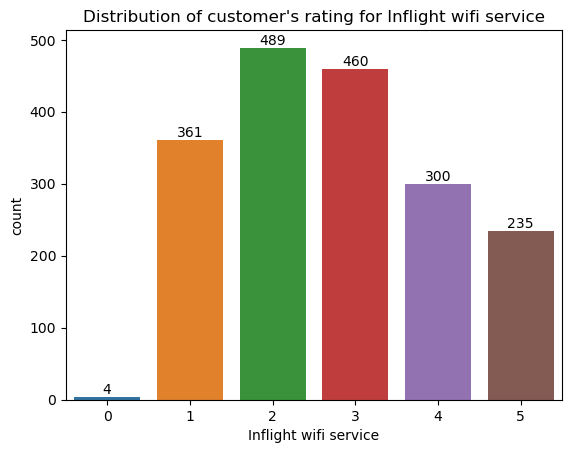

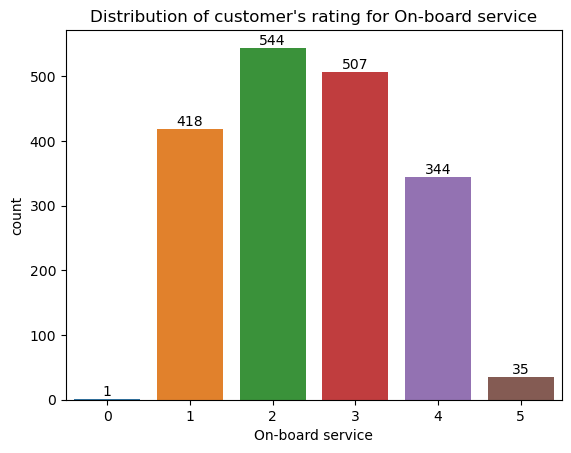

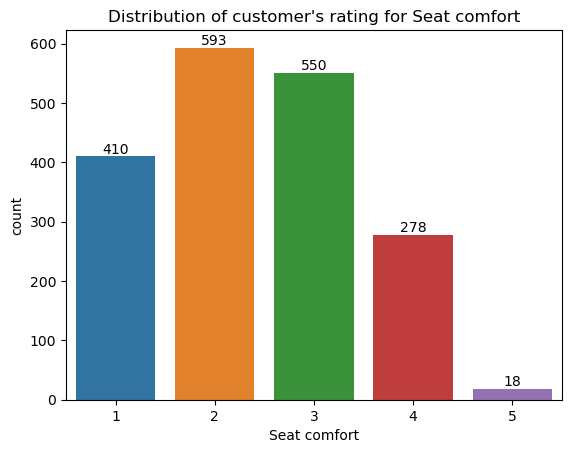

In [61]:
group_dict2['Group 20'] = travellers('Adult','Female','Business travel','Loyal Customer','dissatisfied','Business')

## Scenario 21 :
    Service ratings of those loyal adult male customers who travel for business purpose in business class and are dissatisfied (flight distance between 1000 km and 4000 km)

There are 1824 such customers in this group

Services which are poorly rated by this group of customers : 
Ease of Online booking
Inflight wifi service
On-board service
Seat comfort
Gate location
Leg room service
Food and drink
Online boarding

Services which are average rated by this group of customers : 
Inflight entertainment
Cleanliness
Baggage handling
Checkin service
Online support

Services which are best rated by this group of customers : 
Departure/Arrival time convenient


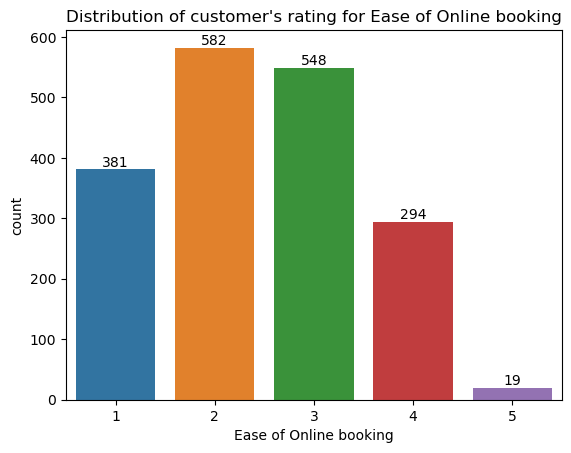

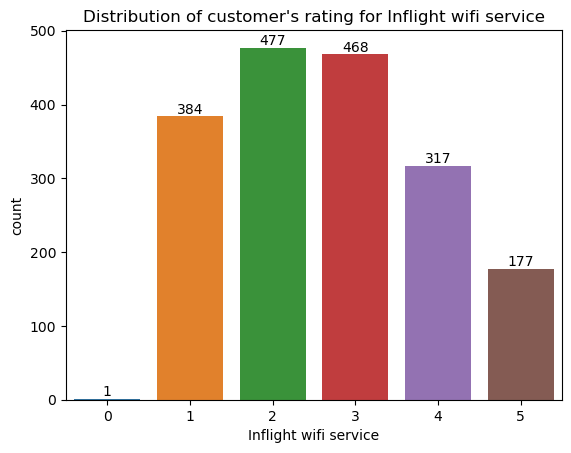

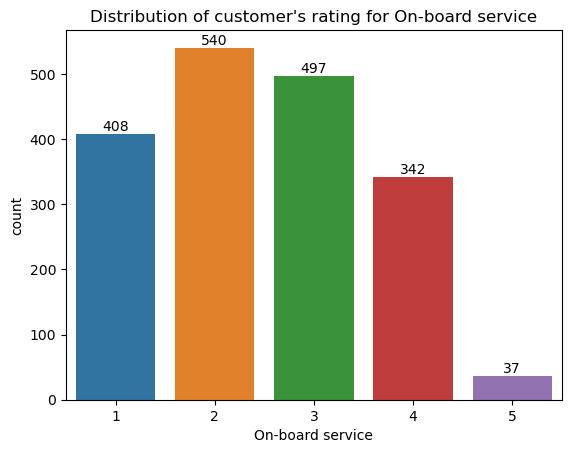

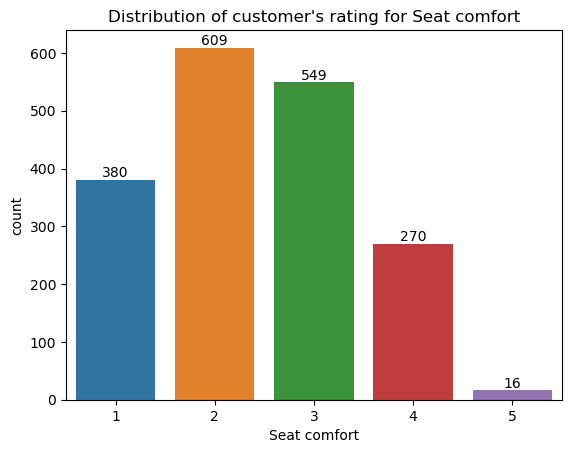

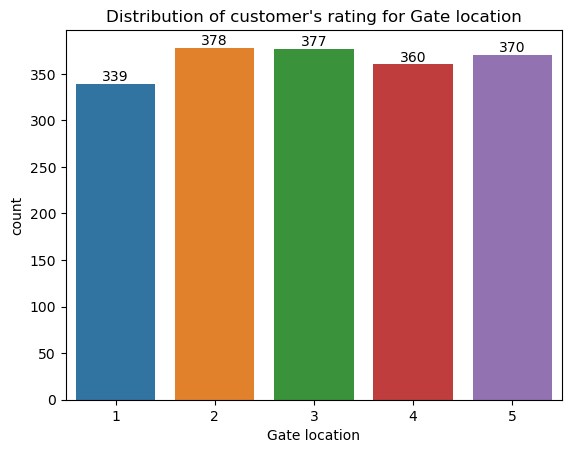

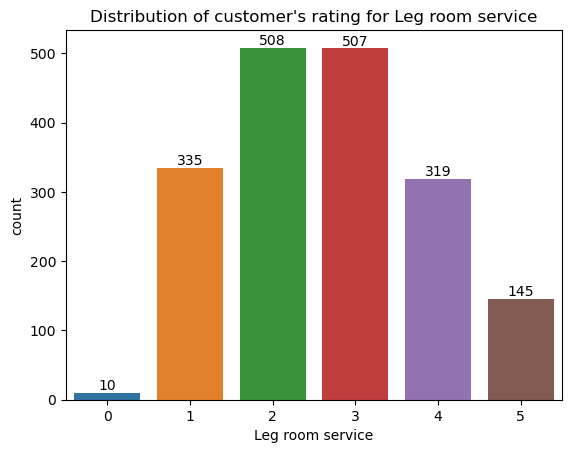

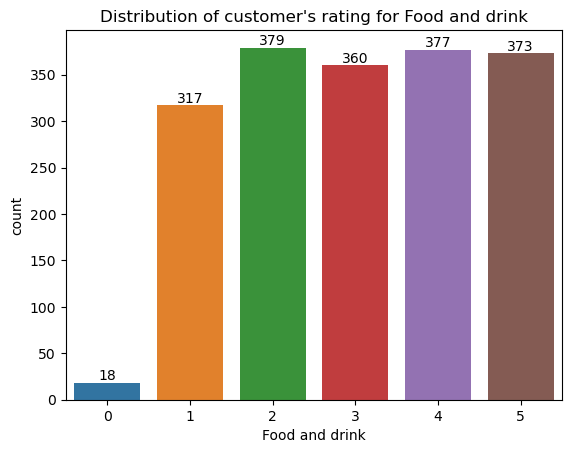

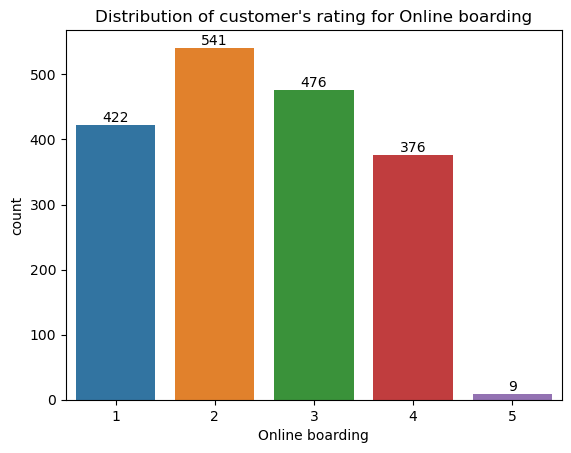

In [62]:
group_dict2['Group 21'] = travellers('Adult','Male','Business travel','Loyal Customer','dissatisfied','Business')

## Scenario 22 :
    Service ratings of those loyal senior citizen female customers who travel for business purpose in business class and are dissatisfied (flight distance between 1000 km and 4000 km)

There are 711 such customers in this group

Services which are poorly rated by this group of customers : 
Departure/Arrival time convenient
Inflight wifi service
On-board service
Seat comfort
Cleanliness
Baggage handling
Online boarding

Services which are average rated by this group of customers : 
Ease of Online booking
Inflight entertainment
Gate location
Leg room service
Food and drink
Checkin service
Online support

Services which are best rated by this group of customers : 


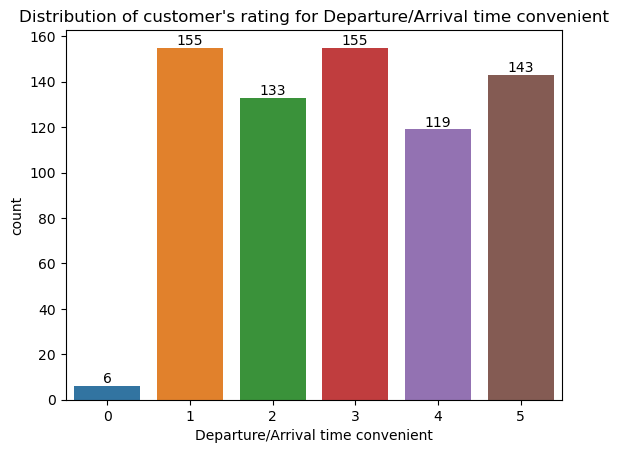

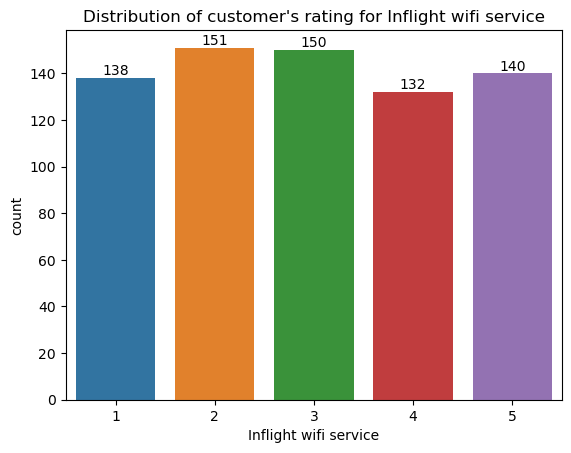

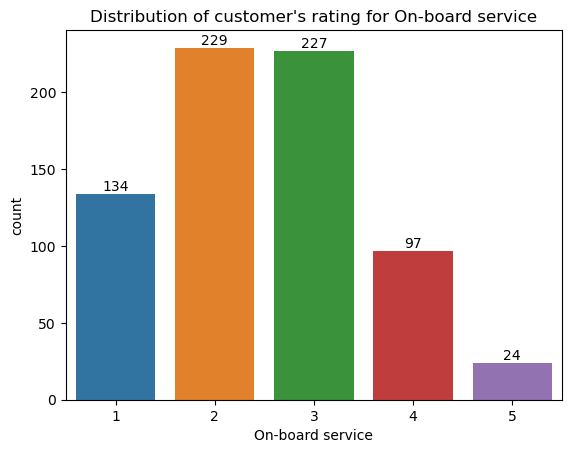

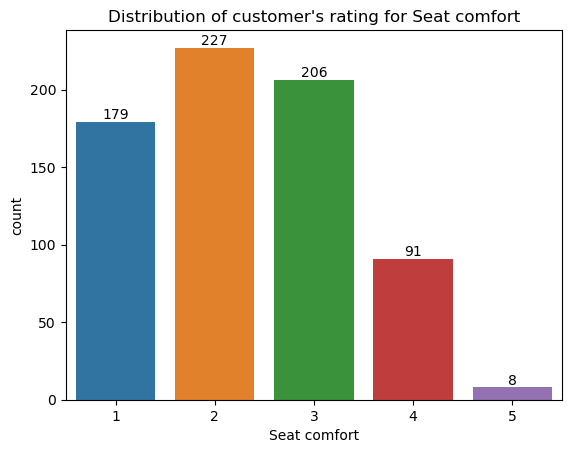

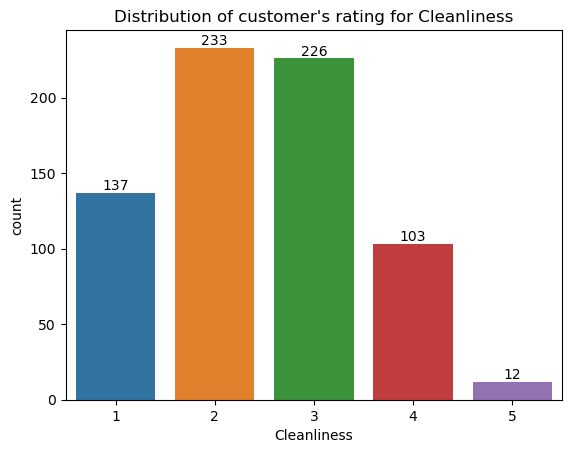

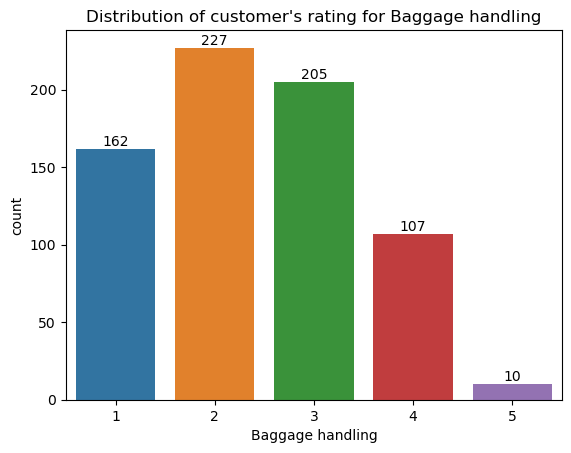

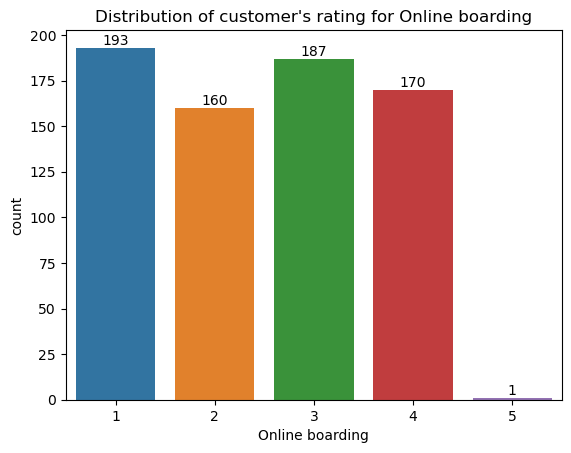

In [63]:
group_dict2['Group 22'] = travellers('Senior Citizen','Female','Business travel','Loyal Customer','dissatisfied','Business')

## Scenario 23 :
    Service ratings of those loyal senior citizen male customers who travel for business purpose in business class and are dissatisfied (flight distance between 1000 km and 4000 km)

There are 704 such customers in this group

Services which are poorly rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
On-board service
Seat comfort
Leg room service
Cleanliness
Baggage handling
Online boarding

Services which are average rated by this group of customers : 
Inflight wifi service
Inflight entertainment
Food and drink
Checkin service
Online support

Services which are best rated by this group of customers : 
Gate location


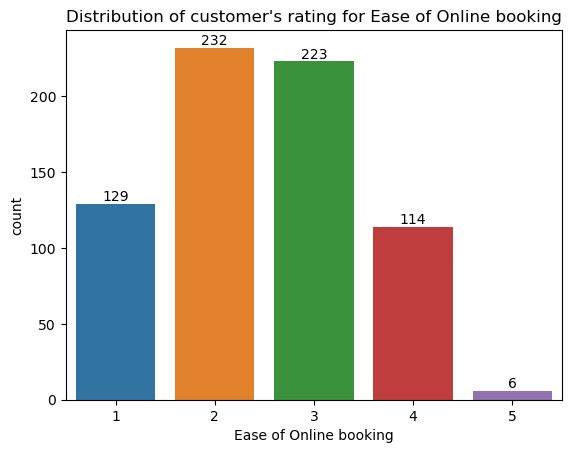

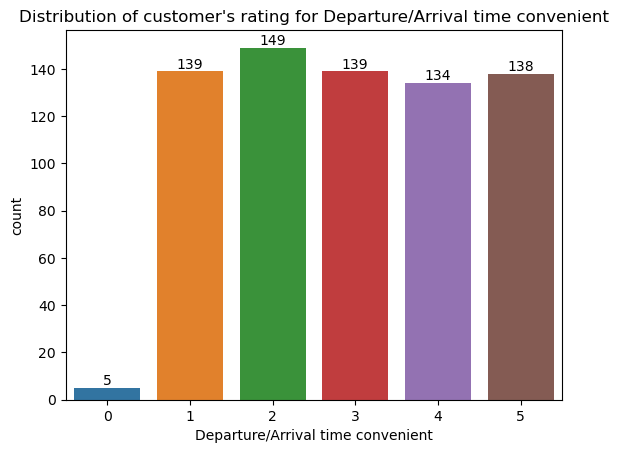

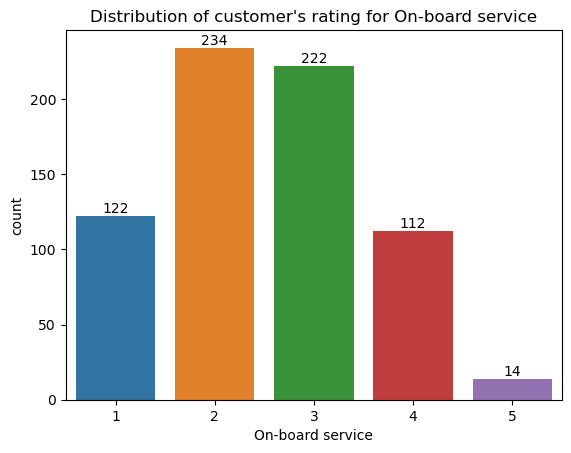

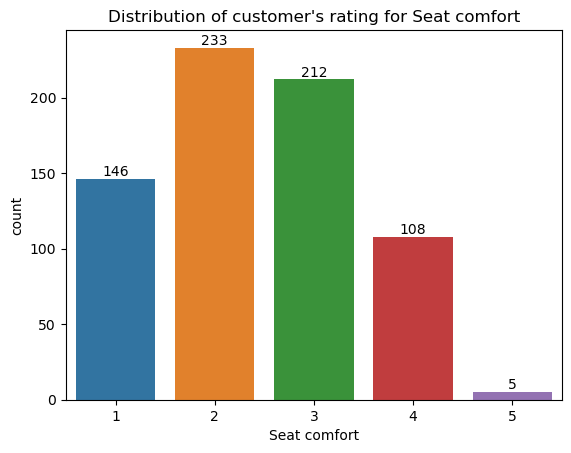

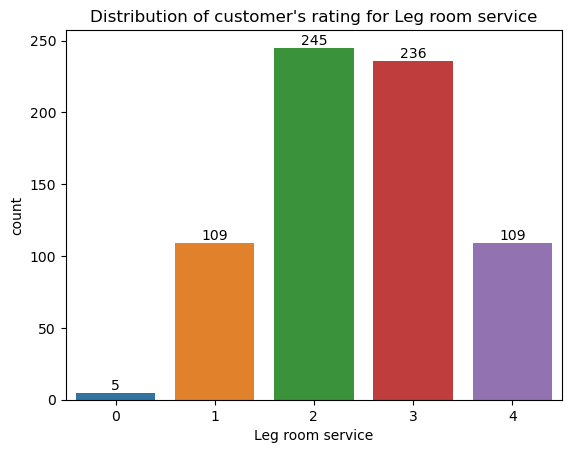

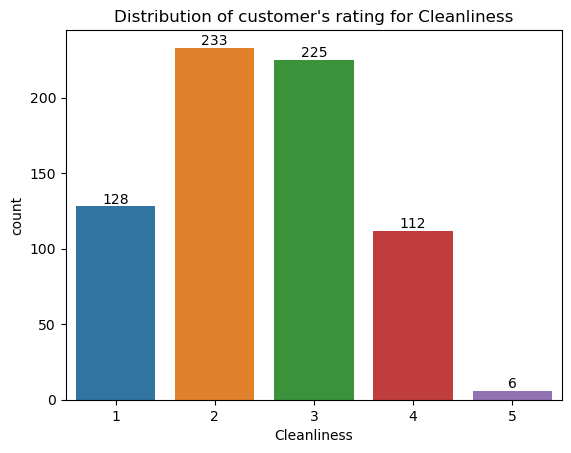

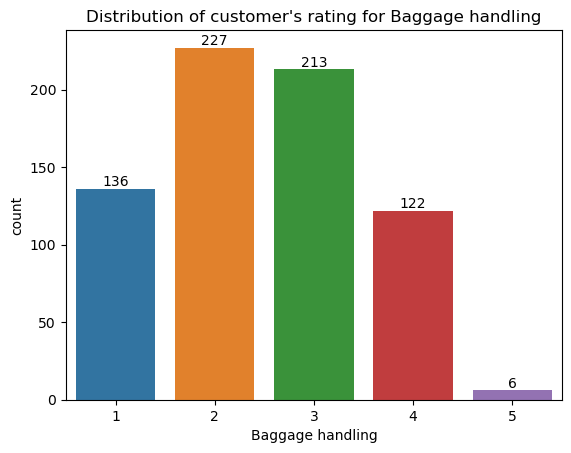

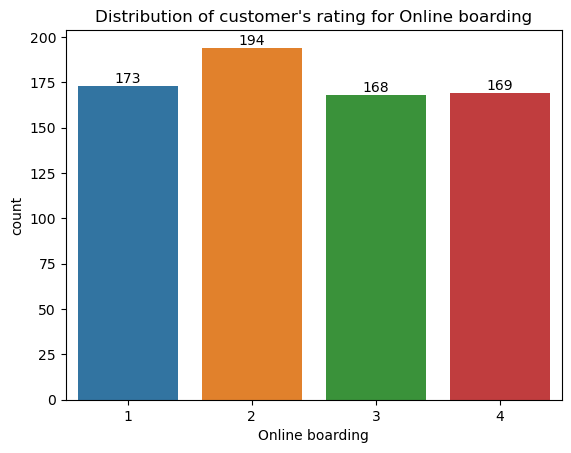

In [64]:
group_dict2['Group 23'] = travellers('Senior Citizen','Male','Business travel','Loyal Customer','dissatisfied','Business')

## Scenario 24 :
    Service ratings of those disloyal adult female customers who travel for business purpose in business class and are dissatisfied (flight distance between 1000 km and 4000 km)

There are 1249 such customers in this group

Services which are poorly rated by this group of customers : 
Departure/Arrival time convenient
Seat comfort
Inflight entertainment
Food and drink
Online support

Services which are average rated by this group of customers : 
Ease of Online booking
Inflight wifi service
On-board service
Gate location
Cleanliness
Baggage handling
Checkin service
Online boarding

Services which are best rated by this group of customers : 
Leg room service


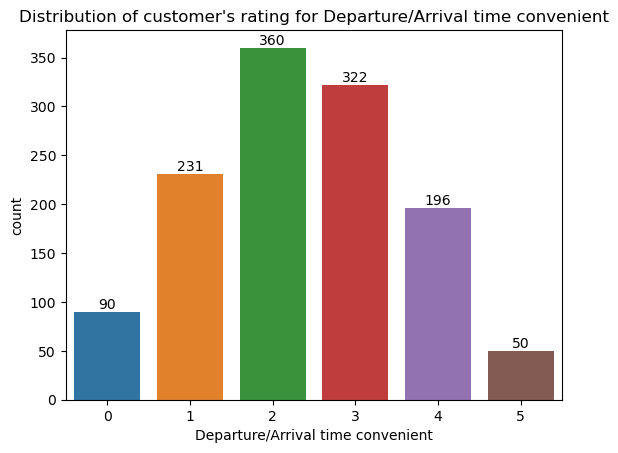

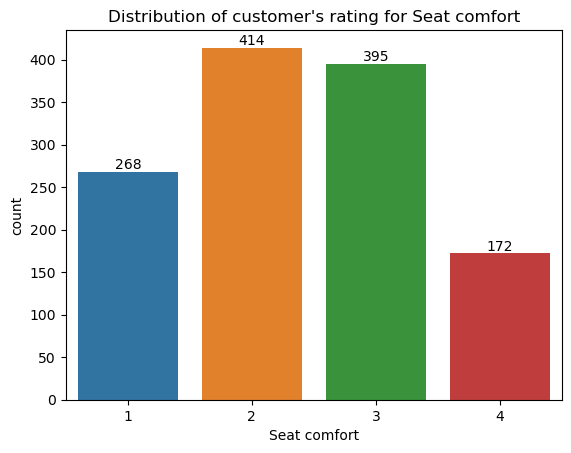

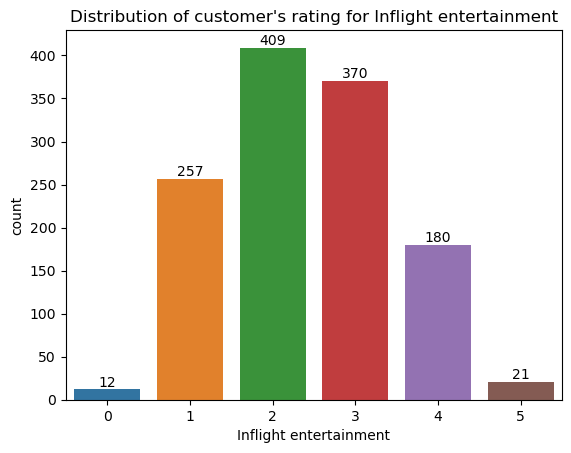

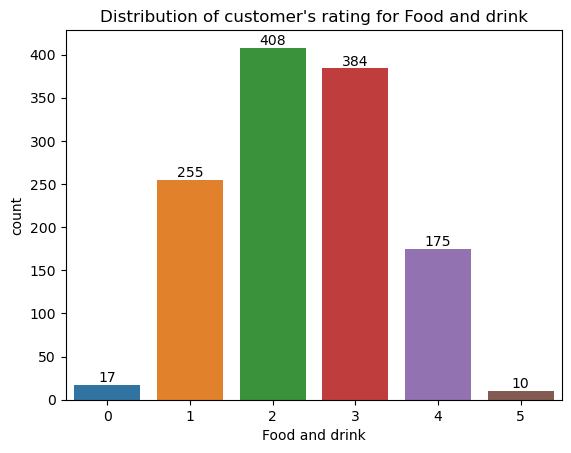

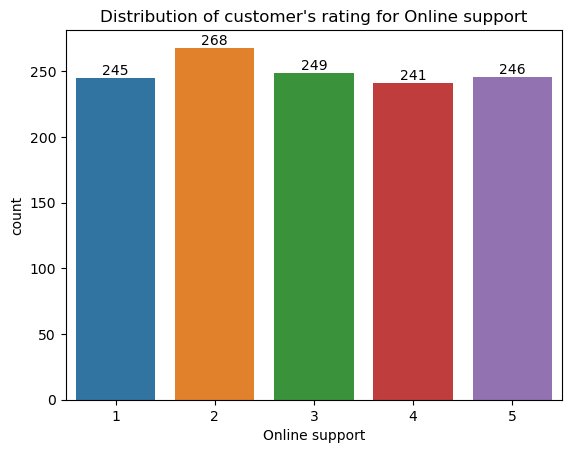

In [65]:
group_dict2['Group 24'] = travellers('Adult','Female','Business travel','disloyal Customer','dissatisfied','Business')

## Scenario 25 :
    Service ratings of those disloyal adult male customers who travel for business purpose in business class and are dissatisfied (flight distance between 1000 km and 4000 km)

There are 1151 such customers in this group

Services which are poorly rated by this group of customers : 
Seat comfort
Online support

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
On-board service
Inflight entertainment
Gate location
Cleanliness
Food and drink
Baggage handling
Checkin service

Services which are best rated by this group of customers : 
Leg room service
Online boarding


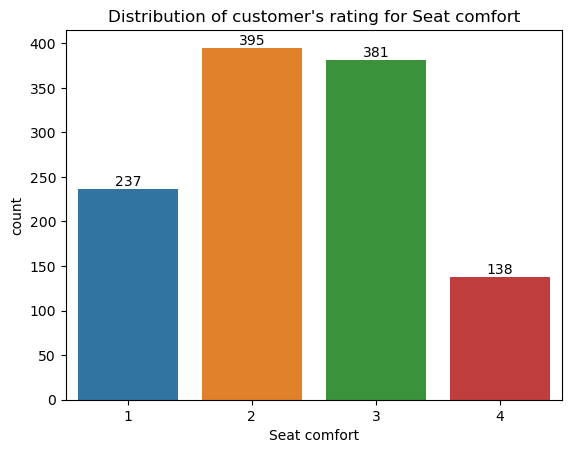

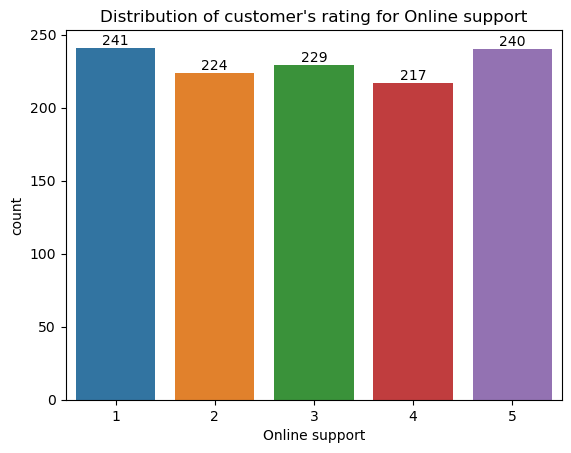

In [66]:
group_dict2['Group 25'] = travellers('Adult','Male','Business travel','disloyal Customer','dissatisfied','Business')

## Scenario 26 :
    Service ratings of those disloyal adult female customers who travel for business purpose in business class and are satisfied (flight distance between 1000 km and 4000 km)

There are 796 such customers in this group

Services which are poorly rated by this group of customers : 
Online support
Online boarding

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
On-board service
Seat comfort
Inflight entertainment
Gate location
Cleanliness
Food and drink
Baggage handling
Checkin service

Services which are best rated by this group of customers : 
Leg room service


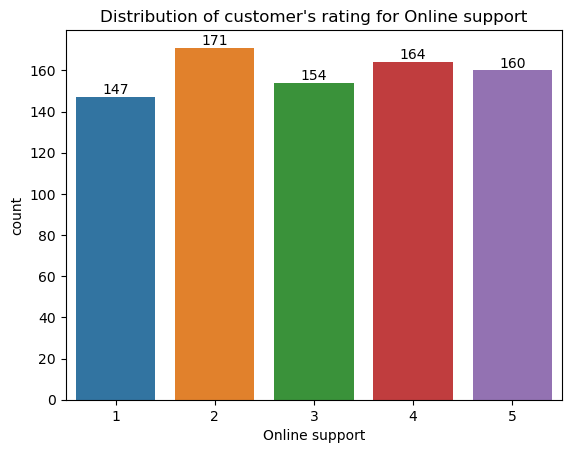

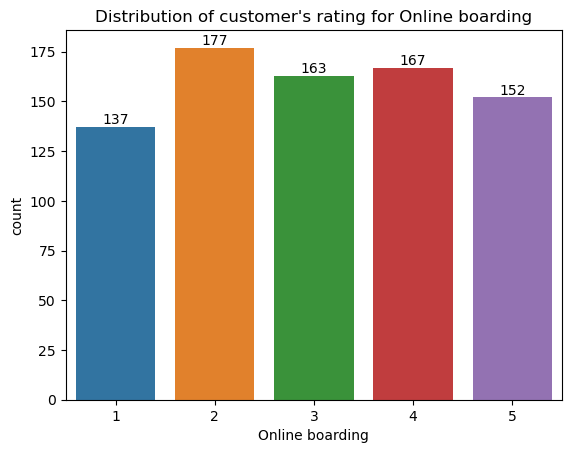

In [67]:
group_dict2['Group 26'] = travellers('Adult','Female','Business travel','disloyal Customer','satisfied','Business')

## Scenario 27 :
    Service ratings of those disloyal adult male customers who travel for business purpose in business class and are satisfied (flight distance between 1000 km and 4000 km)

There are 755 such customers in this group

Services which are poorly rated by this group of customers : 
Departure/Arrival time convenient

Services which are average rated by this group of customers : 
Ease of Online booking
Inflight wifi service
On-board service
Seat comfort
Inflight entertainment
Gate location
Leg room service
Cleanliness
Food and drink
Baggage handling
Online support
Online boarding

Services which are best rated by this group of customers : 
Checkin service


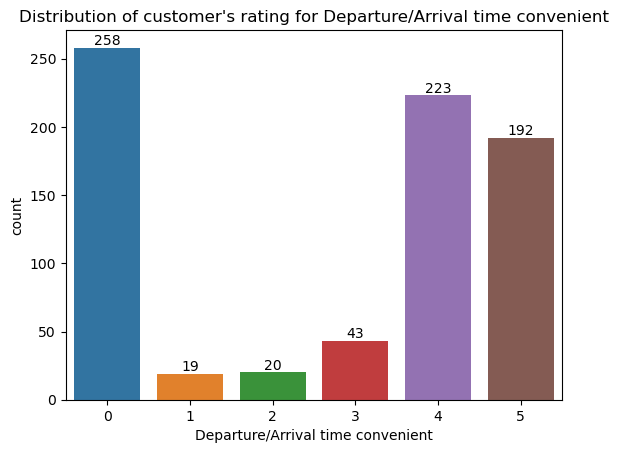

In [68]:
group_dict2['Group 27'] = travellers('Adult','Male','Business travel','disloyal Customer','satisfied','Business')

## Scenario 28 :
    Service ratings of those disloyal adult female customers who travel for business purpose in eco class and are dissatisfied (flight distance between 1000 km and 4000 km)

There are 2087 such customers in this group

Services which are poorly rated by this group of customers : 
Departure/Arrival time convenient
Inflight entertainment
Food and drink

Services which are average rated by this group of customers : 
Ease of Online booking
Inflight wifi service
On-board service
Seat comfort
Gate location
Leg room service
Cleanliness
Baggage handling
Checkin service
Online support
Online boarding

Services which are best rated by this group of customers : 


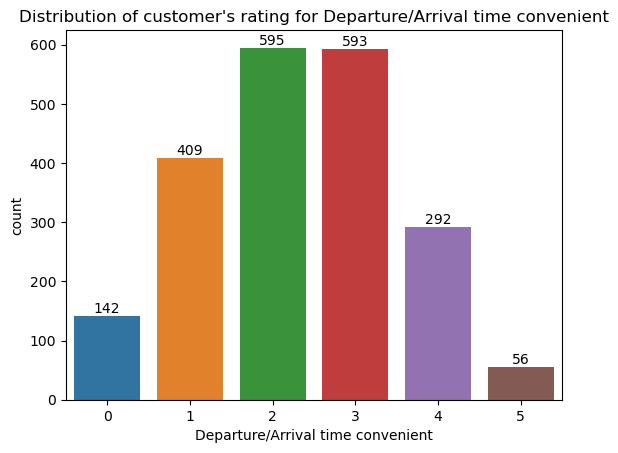

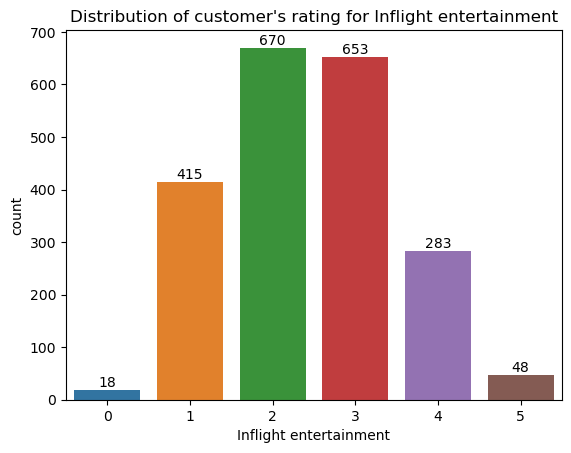

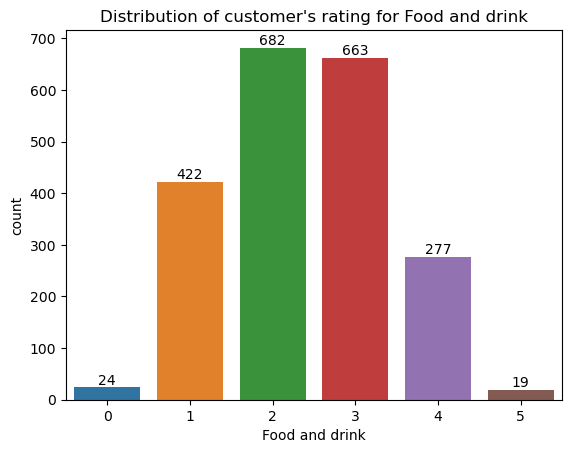

In [69]:
group_dict2['Group 28'] = travellers('Adult','Female','Business travel','disloyal Customer','dissatisfied','Eco')

## Scenario 29 :
    Service ratings of those disloyal adult male customers who travel for business purpose in eco class and are dissatisfied (flight distance between 1000 km and 4000 km)

There are 1817 such customers in this group

Services which are poorly rated by this group of customers : 
Inflight wifi service
Seat comfort
Online support
Online boarding

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
On-board service
Inflight entertainment
Gate location
Leg room service
Cleanliness
Food and drink
Baggage handling
Checkin service

Services which are best rated by this group of customers : 


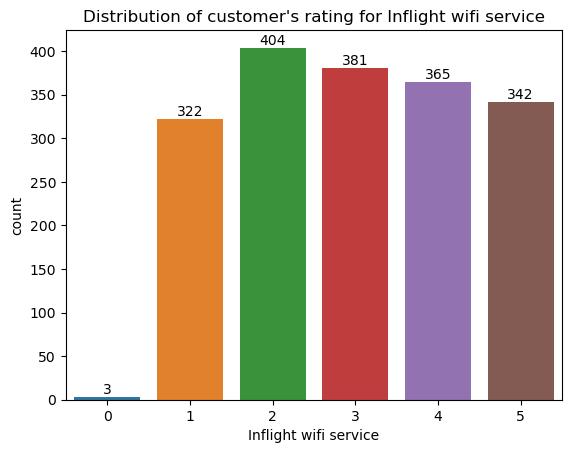

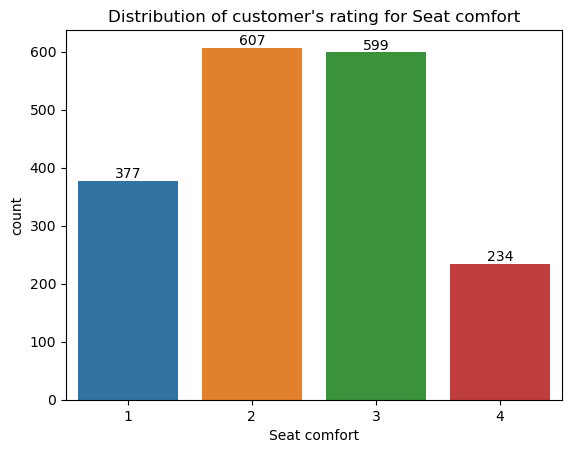

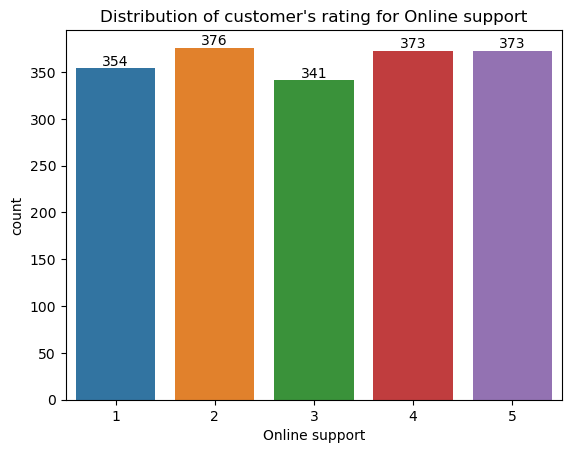

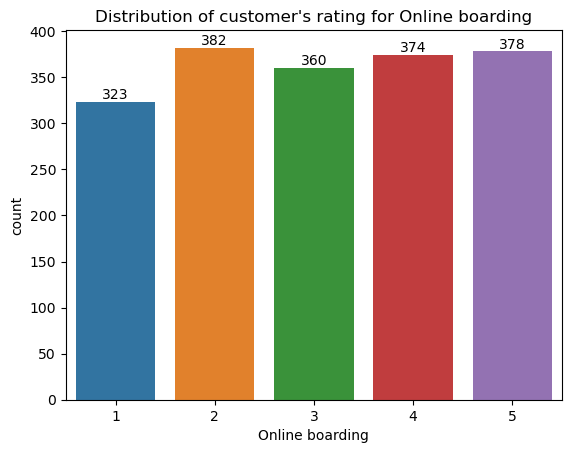

In [70]:
group_dict2['Group 29'] = travellers('Adult','Male','Business travel','disloyal Customer','dissatisfied','Eco')

## Scenario 30 :
    Service ratings of those loyal adult female customers who travel for business purpose in eco plus class and are dissatisfied (flight distance between 1000 km and 4000 km)

There are 225 such customers in this group

Services which are poorly rated by this group of customers : 
On-board service
Gate location
Food and drink
Checkin service
Online support

Services which are average rated by this group of customers : 
Ease of Online booking
Inflight wifi service
Seat comfort
Inflight entertainment
Leg room service
Cleanliness
Baggage handling
Online boarding

Services which are best rated by this group of customers : 
Departure/Arrival time convenient


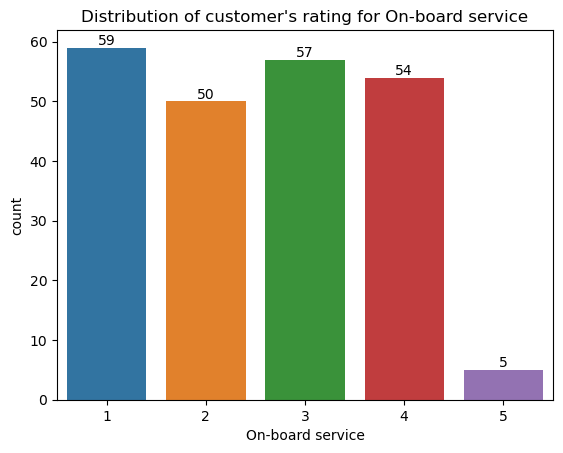

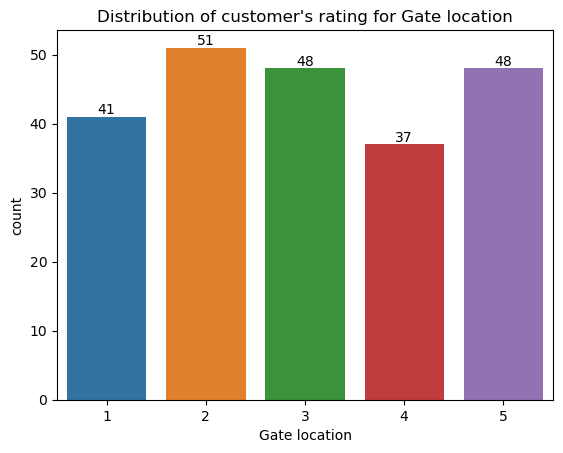

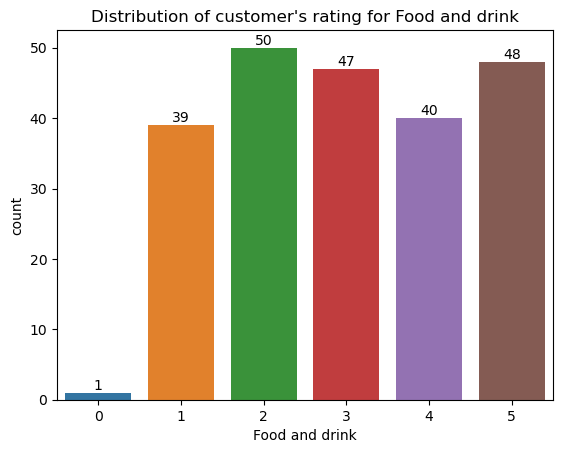

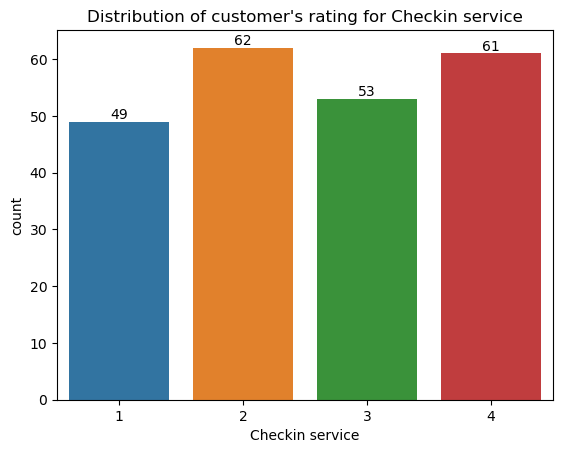

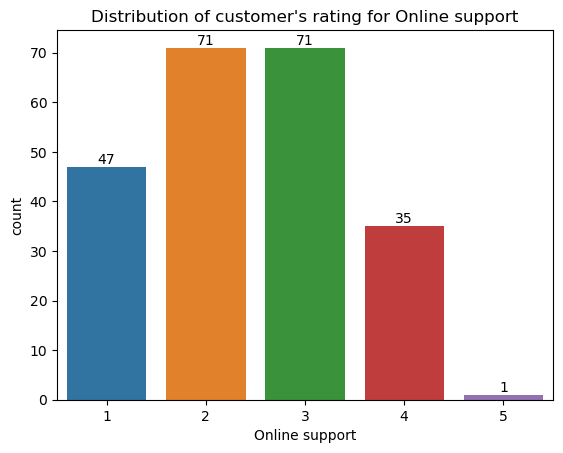

In [71]:
group_dict2['Group 30'] = travellers('Adult','Female','Business travel','Loyal Customer','dissatisfied','Eco Plus')

## Scenario 31 :
    Service ratings of those loyal adult male customers who travel for business purpose in eco plus class and are dissatisfied (flight distance between 1000 km and 4000 km)

There are 358 such customers in this group

Services which are poorly rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
On-board service
Seat comfort
Inflight entertainment
Gate location
Food and drink
Checkin service
Online support
Online boarding

Services which are average rated by this group of customers : 
Leg room service
Cleanliness
Baggage handling

Services which are best rated by this group of customers : 


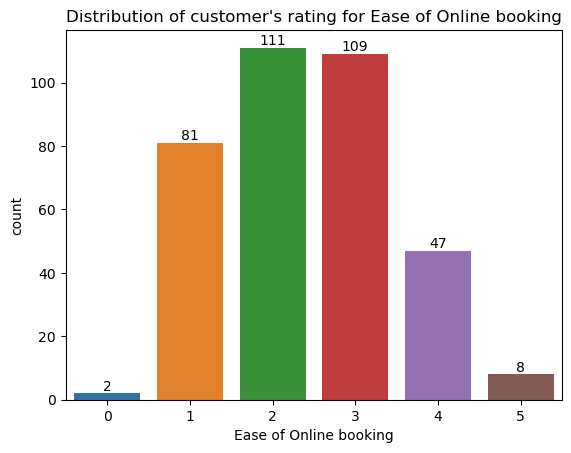

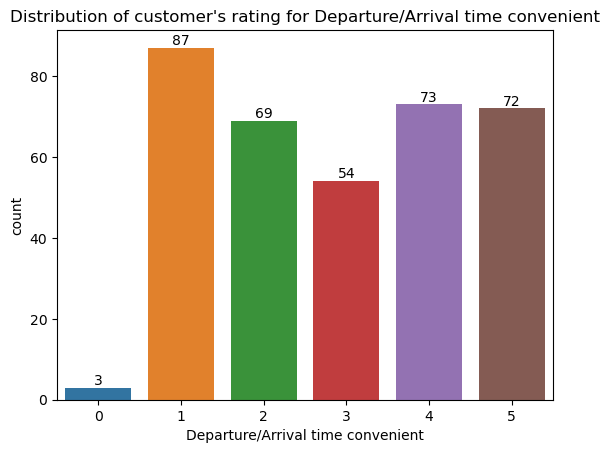

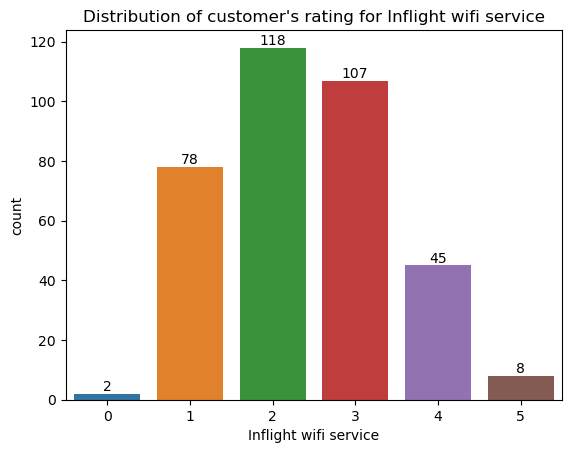

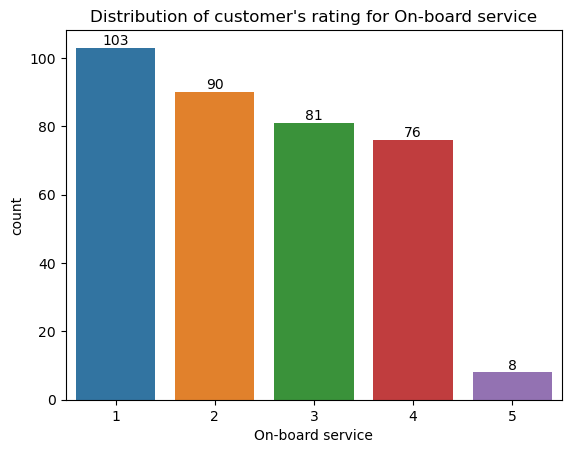

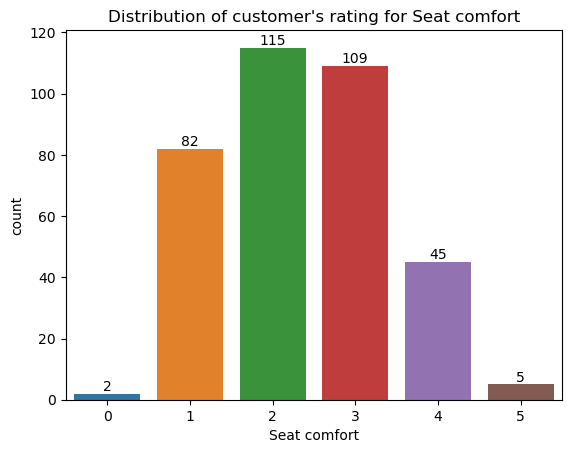

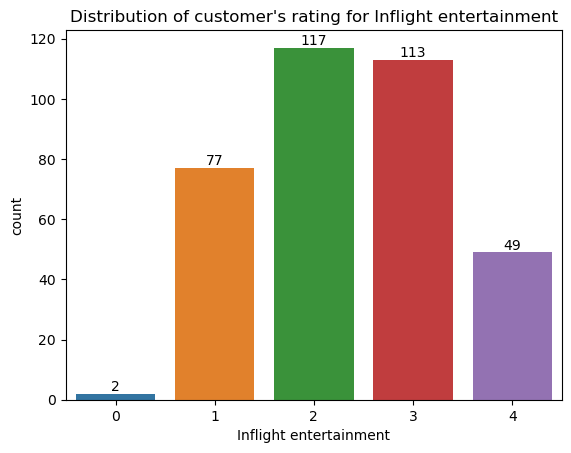

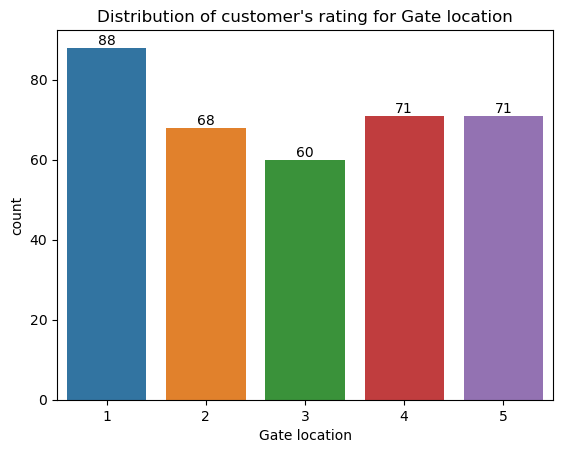

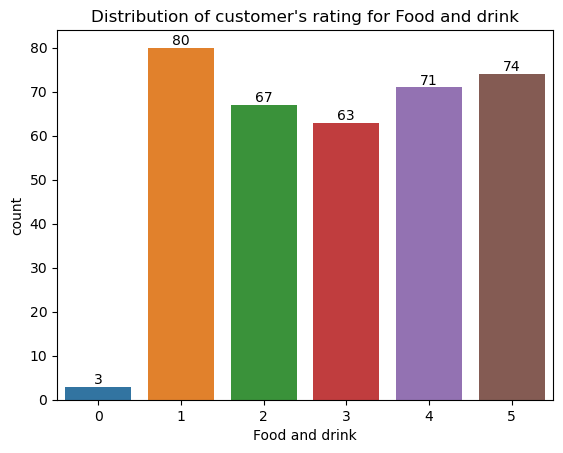

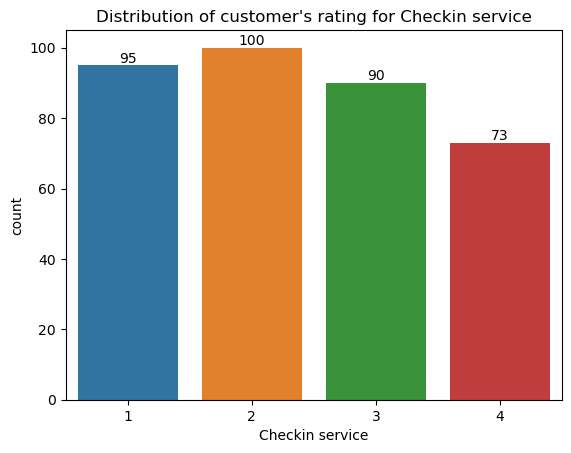

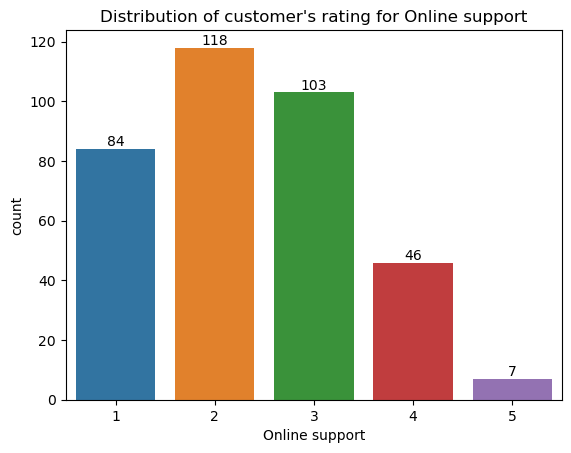

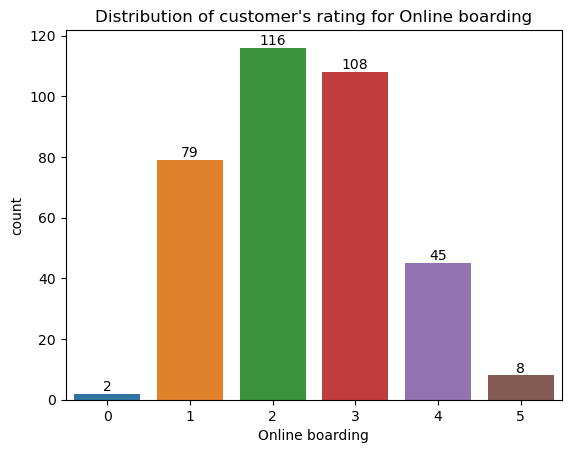

In [72]:
group_dict2['Group 31'] = travellers('Adult','Male','Business travel','Loyal Customer','dissatisfied','Eco Plus')

## Scenario 32 :
    Service ratings of those disloyal adult female customers who travel for business purpose in eco plus class and are dissatisfied (flight distance between 1000 km and 4000 km)

There are 246 such customers in this group

Services which are poorly rated by this group of customers : 
Departure/Arrival time convenient
Inflight wifi service
On-board service
Seat comfort
Inflight entertainment
Food and drink
Checkin service

Services which are average rated by this group of customers : 
Gate location
Leg room service
Cleanliness
Baggage handling

Services which are best rated by this group of customers : 
Ease of Online booking
Online support
Online boarding


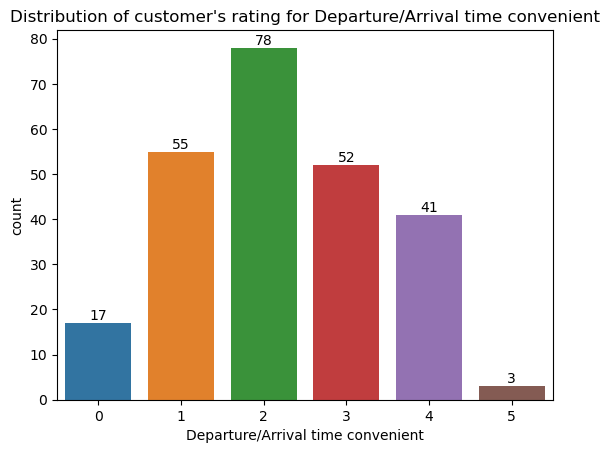

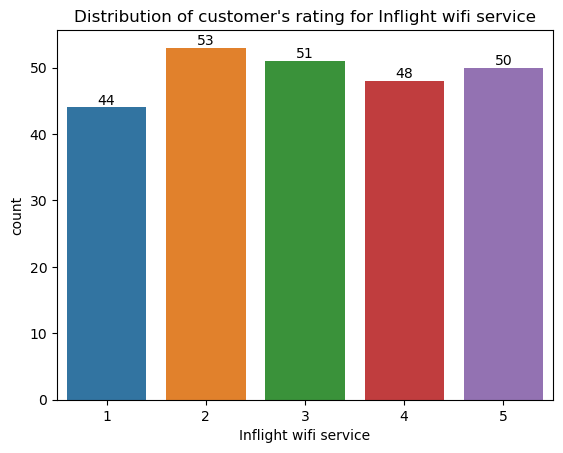

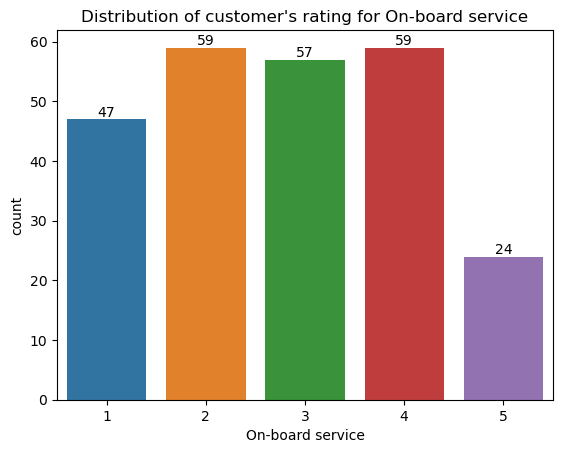

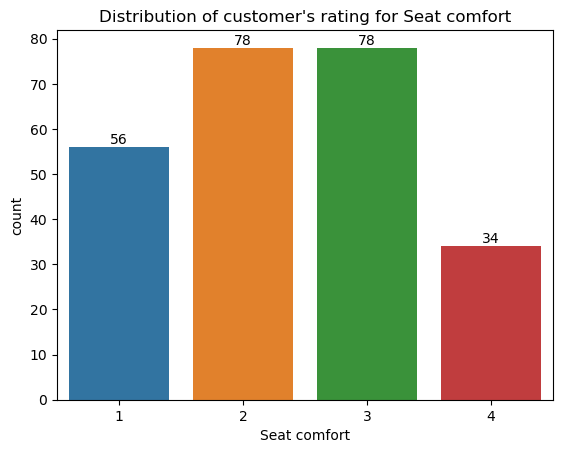

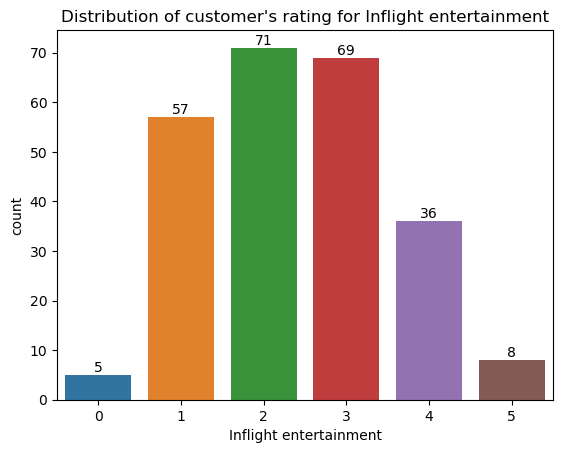

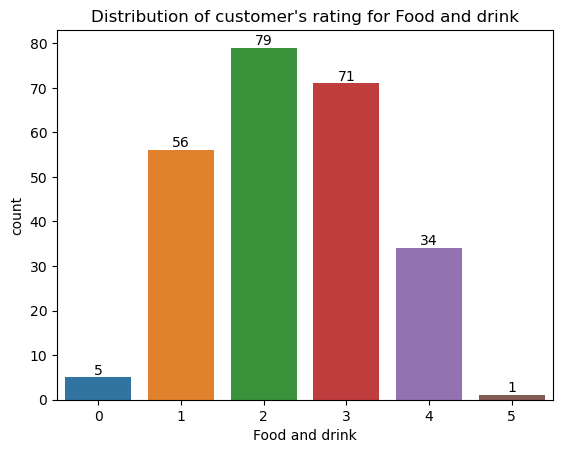

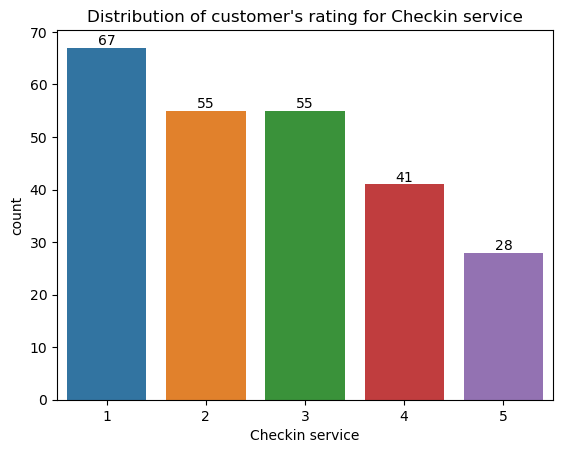

In [73]:
group_dict2['Group 32'] = travellers('Adult','Female','Business travel','disloyal Customer','dissatisfied','Eco Plus')

##### There are 4 group of customers who are loyal and satisfied travelling for not very far distance, but still they are not liking some of the services

## Scenario 33 :
    Service ratings of those loyal adult female customers who travel for business purpose in business class and are satisfied (flight distance between 1000 km and 4000 km)

There are 6344 such customers in this group

Services which are poorly rated by this group of customers : 
Departure/Arrival time convenient
Seat comfort
Gate location

Services which are average rated by this group of customers : 
Ease of Online booking
Inflight wifi service
On-board service
Inflight entertainment
Leg room service
Cleanliness
Baggage handling
Checkin service
Online support
Online boarding

Services which are best rated by this group of customers : 
Food and drink


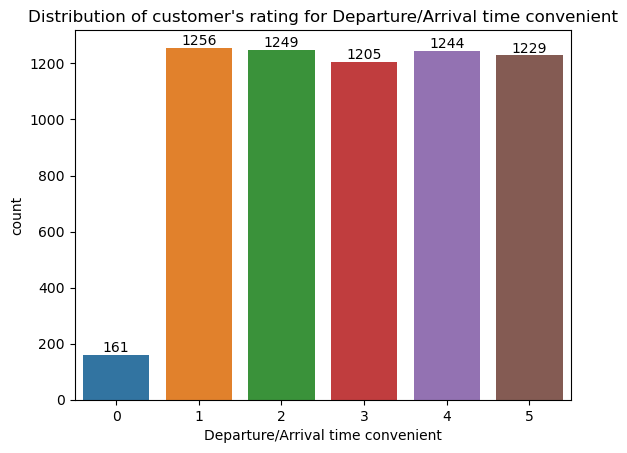

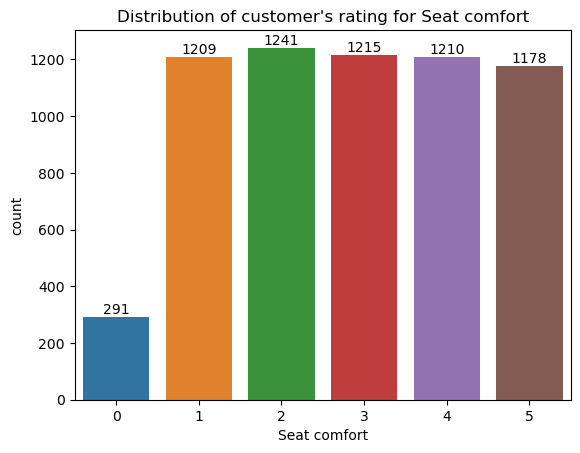

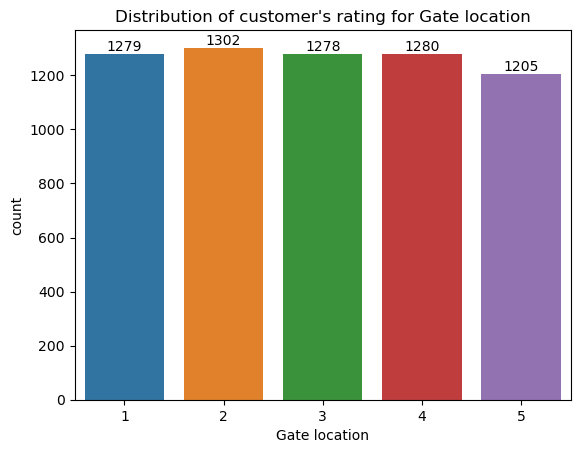

In [74]:
group_dict2['Group 33'] = travellers('Adult','Female','Business travel','Loyal Customer','satisfied','Business')

## Scenario 34 :
    Service ratings of those loyal senior citizen male customers who travel for business purpose in business class and are satisfied (flight distance between 1000 km and 4000 km)

There are 2855 such customers in this group

Services which are poorly rated by this group of customers : 
Gate location

Services which are average rated by this group of customers : 
Ease of Online booking
On-board service
Inflight entertainment
Leg room service
Cleanliness
Baggage handling
Checkin service
Online support
Online boarding

Services which are best rated by this group of customers : 
Departure/Arrival time convenient
Inflight wifi service
Seat comfort
Food and drink


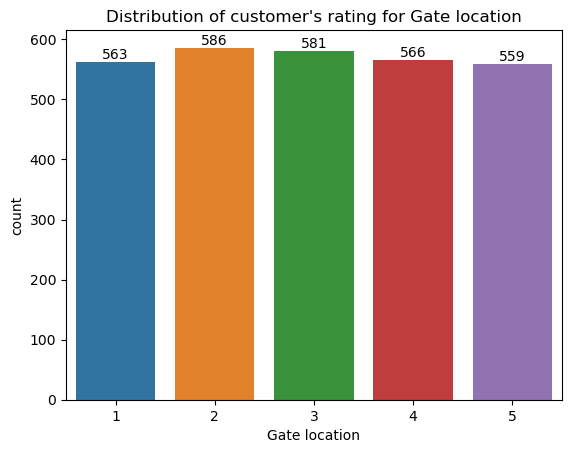

In [75]:
group_dict2['Group 34'] = travellers('Senior Citizen','Male','Business travel','Loyal Customer','satisfied','Business')

## Scenario 35 :
    Service ratings of those loyal adult female customers who travel for business purpose in eco plus class and are satisfied (flight distance between 1000 km and 4000 km)

There are 209 such customers in this group

Services which are poorly rated by this group of customers : 
On-board service
Leg room service
Cleanliness

Services which are average rated by this group of customers : 
Departure/Arrival time convenient
Gate location
Food and drink
Baggage handling

Services which are best rated by this group of customers : 
Ease of Online booking
Inflight wifi service
Seat comfort
Inflight entertainment
Checkin service
Online support
Online boarding


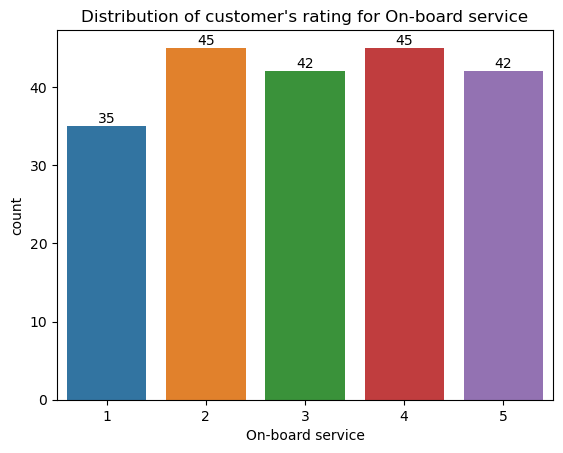

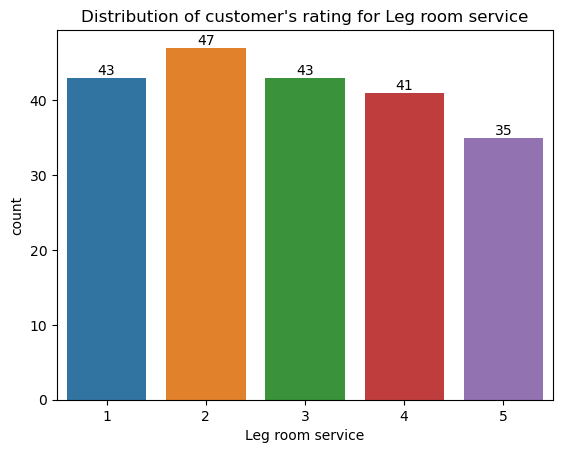

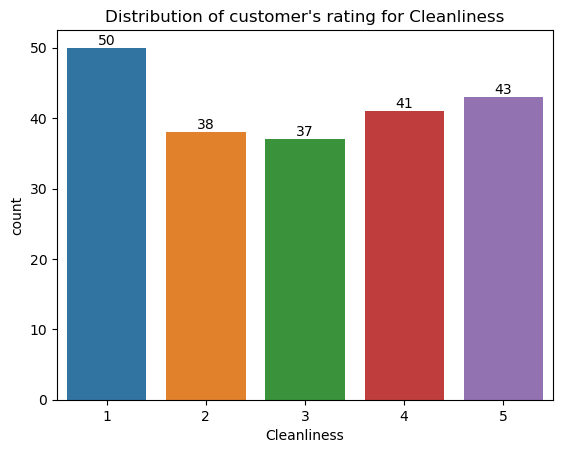

In [76]:
group_dict2['Group 35'] = travellers('Adult','Female','Business travel','Loyal Customer','satisfied','Eco Plus')

## Scenario 36 :
    Service ratings of those loyal adult male customers who travel for business purpose in eco plus class and are satisfied (flight distance between 1000 km and 4000 km)

There are 296 such customers in this group

Services which are poorly rated by this group of customers : 
Departure/Arrival time convenient
On-board service
Leg room service
Baggage handling

Services which are average rated by this group of customers : 
Gate location
Cleanliness
Food and drink
Checkin service

Services which are best rated by this group of customers : 
Ease of Online booking
Inflight wifi service
Seat comfort
Inflight entertainment
Online support
Online boarding


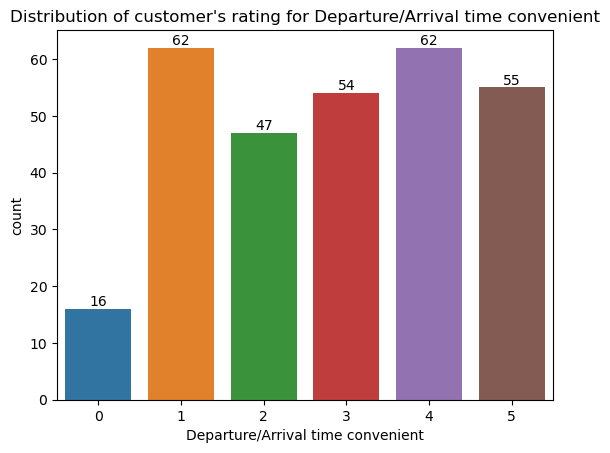

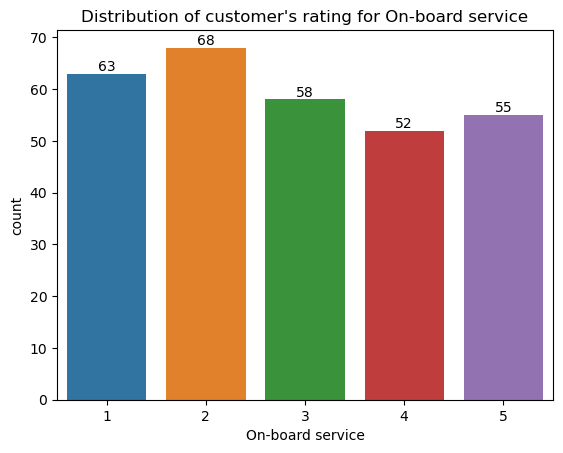

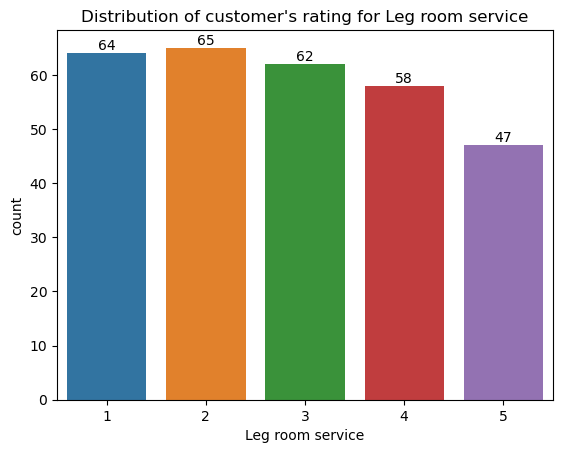

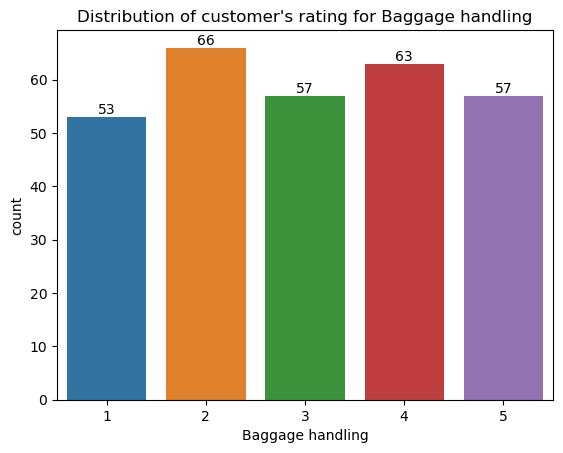

In [77]:
group_dict2['Group 36'] = travellers('Adult','Male','Business travel','Loyal Customer','satisfied','Eco Plus')

##### These are the groups who are satisfied and not rated any services poorly

## Scenario 37 :
    Service ratings of those loyal adult male customers who travel for business purpose in business class and are satisfied (flight distance between 1000 km and 4000 km)

In [78]:
group_dict2['Group 37'] = travellers('Adult','Male','Business travel','Loyal Customer','satisfied','Business')

There are 6367 such customers in this group

Services which are poorly rated by this group of customers : 

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
On-board service
Seat comfort
Inflight entertainment
Gate location
Leg room service
Cleanliness
Food and drink
Baggage handling
Checkin service
Online support
Online boarding

Services which are best rated by this group of customers : 


## Scenario 38 :
    Service ratings of those loyal senior citizen female customers who travel for business purpose in business class and are satisfied (flight distance between 1000 km and 4000 km)

In [79]:
group_dict2['Group 38'] = travellers('Senior Citizen','Female','Business travel','Loyal Customer','satisfied','Business')

There are 2873 such customers in this group

Services which are poorly rated by this group of customers : 

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
On-board service
Seat comfort
Inflight entertainment
Gate location
Leg room service
Cleanliness
Food and drink
Baggage handling
Checkin service
Online boarding

Services which are best rated by this group of customers : 
Inflight wifi service
Online support


In [80]:
for key in group_dict2:
    print(f"{key} -> {group_dict2.get(key)}\n")
        

Group 20 -> {'Features': ['Adult', 'Female', 'Business travel', 'Loyal Customer', 'dissatisfied', 'Business']}

Group 21 -> {'Features': ['Adult', 'Male', 'Business travel', 'Loyal Customer', 'dissatisfied', 'Business']}

Group 22 -> {'Features': ['Senior Citizen', 'Female', 'Business travel', 'Loyal Customer', 'dissatisfied', 'Business']}

Group 23 -> {'Features': ['Senior Citizen', 'Male', 'Business travel', 'Loyal Customer', 'dissatisfied', 'Business']}

Group 24 -> {'Features': ['Adult', 'Female', 'Business travel', 'disloyal Customer', 'dissatisfied', 'Business']}

Group 25 -> {'Features': ['Adult', 'Male', 'Business travel', 'disloyal Customer', 'dissatisfied', 'Business']}

Group 26 -> {'Features': ['Adult', 'Female', 'Business travel', 'disloyal Customer', 'satisfied', 'Business']}

Group 27 -> {'Features': ['Adult', 'Male', 'Business travel', 'disloyal Customer', 'satisfied', 'Business']}

Group 28 -> {'Features': ['Adult', 'Female', 'Business travel', 'disloyal Customer', 'di

In [81]:
group20 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group21 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group22 = data[(data['Age Group']=='Senior Citizen')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group23 = data[(data['Age Group']=='Senior Citizen')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group24 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group25 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group26 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='satisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group27 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='satisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group28 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Eco')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group29 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Eco')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group30 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Eco Plus')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group31 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Eco Plus')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group32 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='disloyal Customer')&(data['satisfaction']=='dissatisfied')&(data['Class']=='Eco Plus')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group33 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='satisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group34 = data[(data['Age Group']=='Senior Citizen')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='satisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group35 = data[(data['Age Group']=='Adult')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='satisfied')&(data['Class']=='Eco Plus')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')                  

group36 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='satisfied')&(data['Class']=='Eco Plus')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group37 = data[(data['Age Group']=='Adult')&(data['Gender']=='Male')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='satisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')

group38 = data[(data['Age Group']=='Senior Citizen')&(data['Gender']=='Female')&(data['Type of Travel']=='Business travel')
     &(data['Customer Type']=='Loyal Customer')&(data['satisfaction']=='satisfied')&(data['Class']=='Business')
     &(data['Flight Distance']>=4000)].sort_values(by = 'Flight Distance')
             

In [82]:

all_groups2 = [group20,group21,group22,group23,group24,group25,group26,group27,group28,group29,
               group30,group31,group32]

poor_ratings = []
for grp in all_groups2:
    for i in cat_num_data:
        if (grp[i].value_counts().index[0]<=2):
            poor_ratings.append(i)

set_ratings = set(poor_ratings)

print("Services require improvement for those customers who are either dissatisfied or disloyal or both\n")
for j in set_ratings:
    if poor_ratings.count(j)>4:
        print(f"{j}")

        

Services require improvement for those customers who are either dissatisfied or disloyal or both

Departure/Arrival time convenient
Inflight wifi service
Seat comfort
Online boarding
Checkin service


In [83]:
sat_but_not_liking_group = [group33,group34,group35,group36]
poor_ratings = []
for grp in sat_but_not_liking_group:
    for i in cat_num_data:
        if (grp[i].value_counts().index[0]<=2):
            poor_ratings.append(i)

set_ratings = set(poor_ratings)

print("Services require improvement for Loyal and Satisfied Customers\n")
for j in set_ratings:
    if poor_ratings.count(j)>=1:
        print(f"{j}")


Services require improvement for Loyal and Satisfied Customers

Ease of Online booking
On-board service
Seat comfort
Leg room service
Cleanliness
Food and drink


In [84]:

list_g2 = list(group_dict2.items())

print("These are the satisfied groups who did not rated any of the services poorly\n")

for i in range(len(list_g2)):
    if i+17<19:
        print(list_g2[i+17])
        

These are the satisfied groups who did not rated any of the services poorly

('Group 37', {'Features': ['Adult', 'Male', 'Business travel', 'Loyal Customer', 'satisfied', 'Business']})
('Group 38', {'Features': ['Senior Citizen', 'Female', 'Business travel', 'Loyal Customer', 'satisfied', 'Business']})


##### Distances are divided in three groups:
      1. Flight distance above 4000 km
      2. Flight distance between 1000 km and 4000 km
      3. Flight distance less than 1000 km 

##### We can see that the customers of first distance group and the customers of second distance group have rated same services poorly.These customers are either dissatisfied or disloyal or both.

##### Also, satisfied and loyal customers of first and second distance groups have rated same services poorly. 

##### But, we are not able to discover the problems faced by children and teenagers.Let's discover it.

In [85]:
def child_teen_travellers(AgeGroup,Gender):
    
    group = data[(data['Age Group']==AgeGroup)&(data['Gender']==Gender)].sort_values(by = 'Flight Distance')
    
    print(f"There are {group.shape[0]} such customers in this group\n")
    

    print("Services which are poorly rated by this group of customers : ")
    for i in cat_num_data:
        if (group[i].value_counts().index[0]<=2):
            print(f"{i}")
            
    print("\nServices which are average rated by this group of customers : ")
    for i in cat_num_data:        
        if (group[i].value_counts().index[0]<=4) and (group[i].value_counts().index[0]>2):
            print(f"{i}") 
    print("\nServices which are best rated by this group of customers : ")        
    for i in cat_num_data:         
        if (group[i].value_counts().index[0]==5):
            print(f"{i}")
 
    for i in range(len(cat_num_data)):
        if (group[cat_num_data[i]].value_counts().index[0]<=2):
            ax = sns.countplot(group,x = cat_num_data[i])
            ax.bar_label(ax.containers[0])
            plt.title(f"Distribution of customer's rating for {cat_num_data[i]}")  
            plt.show()
     
    

## Scenario 39 :
    Service ratings of children female customers

In [86]:
child_teen_travellers('Children','Female')

There are 2403 such customers in this group

Services which are poorly rated by this group of customers : 

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
On-board service
Seat comfort
Inflight entertainment
Gate location
Leg room service
Cleanliness
Food and drink
Baggage handling
Checkin service
Online support
Online boarding

Services which are best rated by this group of customers : 


##### Female children have not rated any services poorly

## Scenario 40 :
      Service ratings of those loyal children male customers who travel for personal purpose in eco class and are dissatisfied

There are 2368 such customers in this group

Services which are poorly rated by this group of customers : 
Seat comfort
Food and drink

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
On-board service
Inflight entertainment
Gate location
Leg room service
Cleanliness
Baggage handling
Checkin service
Online support
Online boarding

Services which are best rated by this group of customers : 


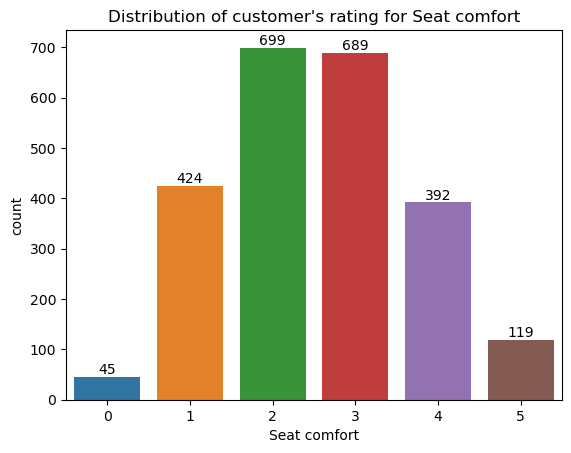

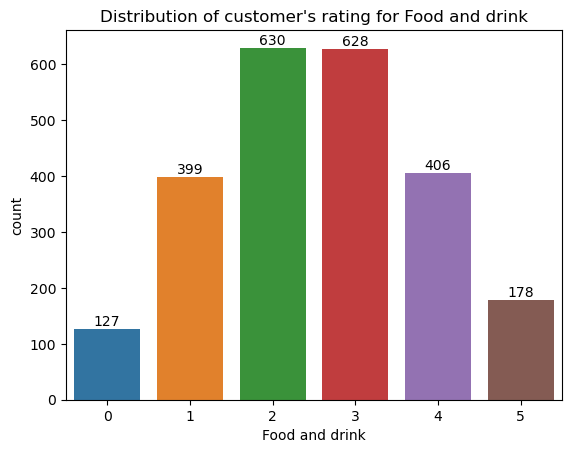

In [87]:
child_teen_travellers('Children','Male')

##### Male children have rated 2 services poorly, i.e., Food and Drink & Seat Comfort

## Scenario 41 :
    Service ratings of those loyal teenager female customers who travel for personal purpose in eco class and are dissatisfied

In [88]:
child_teen_travellers('Teenager','Female')

There are 4728 such customers in this group

Services which are poorly rated by this group of customers : 

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
On-board service
Seat comfort
Inflight entertainment
Gate location
Leg room service
Cleanliness
Food and drink
Baggage handling
Checkin service
Online support
Online boarding

Services which are best rated by this group of customers : 


##### Female teenager have not rated any services poorly

## Scenario 42 : 
    Service ratings of those loyal teenager female customers who travel for personal purpose in eco class and are satisfied

There are 4514 such customers in this group

Services which are poorly rated by this group of customers : 
Food and drink

Services which are average rated by this group of customers : 
Ease of Online booking
Departure/Arrival time convenient
Inflight wifi service
On-board service
Seat comfort
Inflight entertainment
Gate location
Leg room service
Cleanliness
Baggage handling
Checkin service
Online support
Online boarding

Services which are best rated by this group of customers : 


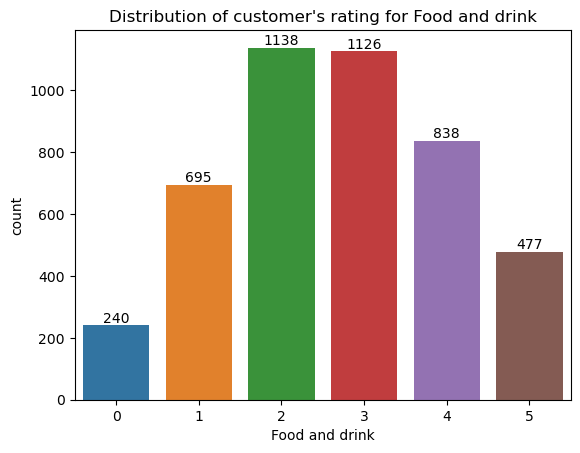

In [89]:
child_teen_travellers('Teenager','Male')

##### Male teenagers have rated 1 service poorly, i.e., Food and drink.

##### All group of customers need a good seat comfort, that is very important.